### Binary Classification of Machine Failures

Playground Series - Season 3, Episode 17

https://www.kaggle.com/competitions/playground-series-s3e17/overview


#### 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [2]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [5]:
train.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
test.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

- 연속형 피처는 높은 순으로 정렬하고 유일값이 2개인 피처들은 개수 확인

In [7]:
train['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

In [8]:
train['Air temperature [K]'].sort_values(ascending=False)

92325     304.4
134117    304.4
83984     304.4
26064     304.4
52490     304.4
          ...  
77554     295.4
79092     295.3
42381     295.3
119576    295.3
31605     295.3
Name: Air temperature [K], Length: 136429, dtype: float64

In [9]:
display(train['Process temperature [K]'].sort_values(ascending=False),
        train['Rotational speed [rpm]'].sort_values(ascending=False),
        train['Torque [Nm]'].sort_values(ascending=False),
        train['Tool wear [min]'].sort_values(ascending=False))

37148     313.8
55171     313.8
17555     313.8
126863    313.8
86667     313.8
          ...  
119576    305.8
44537     305.8
77554     305.8
128155    305.8
135263    305.8
Name: Process temperature [K], Length: 136429, dtype: float64

115121    2886
24555     2886
74415     2874
27997     2874
116370    2874
          ... 
109846    1183
120597    1183
10802     1183
17915     1183
23070     1181
Name: Rotational speed [rpm], Length: 136429, dtype: int64

20092     76.6
34276     76.6
113285    76.6
10889     76.6
28338     76.4
          ... 
102438     4.2
96815      4.2
112786     4.2
3856       4.0
118673     3.8
Name: Torque [Nm], Length: 136429, dtype: float64

24853     253
104666    253
33104     253
27603     251
117946    246
         ... 
59144       0
35376       0
93418       0
93426       0
85093       0
Name: Tool wear [min], Length: 136429, dtype: int64

In [10]:
display(train['TWF'].value_counts(),
        train['HDF'].value_counts(),
        train['PWF'].value_counts(),
        train['OSF'].value_counts(),
        train['RNF'].value_counts())

0    136217
1       212
Name: TWF, dtype: int64

0    135725
1       704
Name: HDF, dtype: int64

0    136102
1       327
Name: PWF, dtype: int64

0    135889
1       540
Name: OSF, dtype: int64

0    136121
1       308
Name: RNF, dtype: int64

5개 피처 모두 0인 경우가 훨씬 많음

- 상관관계 확인

<ipython-input-11-218c474cc7cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train.corr(), annot=True, cmap='Blues')


<Axes: >

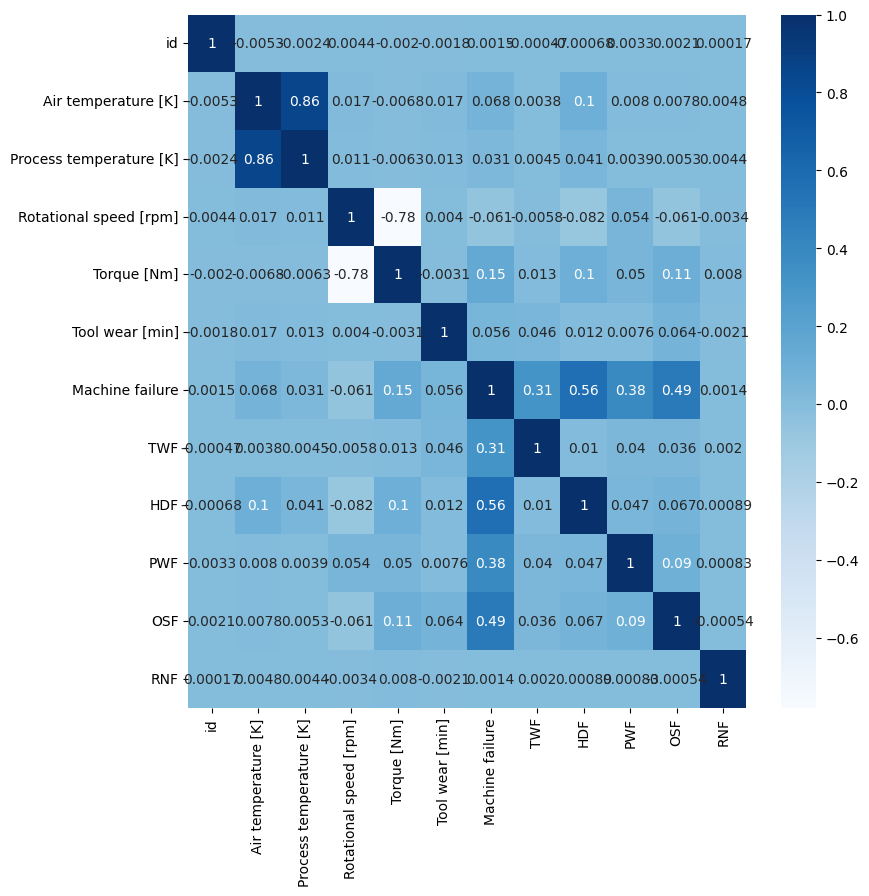

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(data=train.corr(), annot=True, cmap='Blues')

Machine Failure와 높은 상관성을 가지는 피처 없음 >> 이상치를 제거할만한 피처가 없음



In [12]:
train['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

타겟값의 분포가 불균형함

#### 전처리

- 데이터 나누기

In [13]:
from sklearn.model_selection import train_test_split
X_train = train.drop(['id', 'Product ID', 'Machine failure'], axis=1)
y_train = train['Machine failure']
X_test = test.drop(['id', 'Product ID'], axis=1)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [14]:
X_TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109143 entries, 131389 to 43567
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     109143 non-null  object 
 1   Air temperature [K]      109143 non-null  float64
 2   Process temperature [K]  109143 non-null  float64
 3   Rotational speed [rpm]   109143 non-null  int64  
 4   Torque [Nm]              109143 non-null  float64
 5   Tool wear [min]          109143 non-null  int64  
 6   TWF                      109143 non-null  int64  
 7   HDF                      109143 non-null  int64  
 8   PWF                      109143 non-null  int64  
 9   OSF                      109143 non-null  int64  
 10  RNF                      109143 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 10.0+ MB


In [15]:
X_TEST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27286 entries, 62809 to 134985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     27286 non-null  object 
 1   Air temperature [K]      27286 non-null  float64
 2   Process temperature [K]  27286 non-null  float64
 3   Rotational speed [rpm]   27286 non-null  int64  
 4   Torque [Nm]              27286 non-null  float64
 5   Tool wear [min]          27286 non-null  int64  
 6   TWF                      27286 non-null  int64  
 7   HDF                      27286 non-null  int64  
 8   PWF                      27286 non-null  int64  
 9   OSF                      27286 non-null  int64  
 10  RNF                      27286 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 2.5+ MB


In [16]:
display(Y_TRAIN.info(), Y_TEST.info())

<class 'pandas.core.series.Series'>
Int64Index: 109143 entries, 131389 to 43567
Series name: Machine failure
Non-Null Count   Dtype
--------------   -----
109143 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB
<class 'pandas.core.series.Series'>
Int64Index: 27286 entries, 62809 to 134985
Series name: Machine failure
Non-Null Count  Dtype
--------------  -----
27286 non-null  int64
dtypes: int64(1)
memory usage: 426.3 KB


None

None

- 칼럼명 깔끔하게 바꾸기

In [17]:
X_TRAIN.rename(columns={'Air temperature [K]' : 'Air_temperature',
                   'Process temperature [K]' : 'Process_temperature',
                    'Rotational speed [rpm]' : 'Rotational_speed',
                        'Torque [Nm]' : 'Torque',
                        'Tool wear [min]' : 'Tool_wear'}, inplace=True)

X_TEST.rename(columns={'Air temperature [K]' : 'Air_temperature',
                   'Process temperature [K]' : 'Process_temperature',
                    'Rotational speed [rpm]' : 'Rotational_speed',
                        'Torque [Nm]' : 'Torque',
                        'Tool wear [min]' : 'Tool_wear'}, inplace=True)

In [18]:
display(X_TRAIN.columns, X_TEST.columns)

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

- Type 피처 one-hot encoding 진행 **>> 범죄 유형 분류에서 '요일'과 '범죄발생지'를 인코딩 후 새로운 칼럼으로 생성한게 생각나서 적용해봄**

In [19]:
X_TRAIN = pd.concat([X_TRAIN, pd.get_dummies(X_TRAIN['Type'])], axis=1)
print(X_TRAIN.shape)
X_TRAIN.head(3)

(109143, 14)


,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF,H,L,M
131389,L,302.5,311.1,1389,53.5,135,0,0,0,0,0,0,1,0
50495,L,301.0,312.0,1675,30.7,113,0,0,0,0,0,0,1,0
37400,L,300.7,310.5,1541,36.0,194,0,0,0,0,0,0,1,0


In [20]:
X_TRAIN = X_TRAIN.drop('Type', axis=1)

In [21]:
X_TEST = pd.concat([X_TEST, pd.get_dummies(X_TEST['Type'])], axis=1)
print(X_TEST.shape)
X_TEST.head(3)

(27286, 14)


,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF,H,L,M
62809,H,302.2,311.5,1404,51.6,24,0,0,0,0,0,1,0,0
63948,L,299.2,308.5,1606,51.0,171,0,0,0,0,0,0,1,0
120821,L,300.0,311.4,1634,31.9,24,0,0,0,0,0,0,1,0


In [22]:
X_TEST = X_TEST.drop('Type', axis=1)

In [23]:
display(X_TRAIN.info(), X_TEST.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109143 entries, 131389 to 43567
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Air_temperature      109143 non-null  float64
 1   Process_temperature  109143 non-null  float64
 2   Rotational_speed     109143 non-null  int64  
 3   Torque               109143 non-null  float64
 4   Tool_wear            109143 non-null  int64  
 5   TWF                  109143 non-null  int64  
 6   HDF                  109143 non-null  int64  
 7   PWF                  109143 non-null  int64  
 8   OSF                  109143 non-null  int64  
 9   RNF                  109143 non-null  int64  
 10  H                    109143 non-null  uint8  
 11  L                    109143 non-null  uint8  
 12  M                    109143 non-null  uint8  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 9.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27286 entr

None

None

- 타겟값 오버샘플링 진행, SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_TRAIN_over, Y_TRAIN_over = smote.fit_resample(X_TRAIN, Y_TRAIN)
print('SMOTE 적용 전 학습용 피처/레이블 데이터셋:', X_TRAIN.shape, Y_TRAIN.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터셋:', X_TRAIN_over.shape, Y_TRAIN_over.shape)
print('SMOTE 적용 후 레이블값 분포: \n', pd.Series(Y_TRAIN_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터셋: (109143, 13) (109143,)
SMOTE 적용 후 학습용 피처/레이블 데이터셋: (214874, 13) (214874,)
SMOTE 적용 후 레이블값 분포: 
 0    107437
1    107437
Name: Machine failure, dtype: int64


학습용 데이터가 증식됐고 SMOTE 적용 후 레이블값 분포도 동일해짐

#### 모델 선정, 하이퍼 파라미터 튜닝

- 여러 모델로 학습시켜보고 여러 평가 지표로 평가할 수 있는 함수 생성, 가장 뛰어난 모델 뽑아내기

- 이 부분은 https://www.kaggle.com/code/natalialimanska/machine-failure-eda-and-classification#3.-Baseline-Modeling 일부 참고


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

#여러 모델을 정의한 리스트 생성
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGBoost Classifier', XGBClassifier()),
    ('LGBMClassifier', LGBMClassifier())]

#각 모델의 결과를 저장하는 리스트 생성
results = []

for name, model in models:

    model.fit(X_TRAIN, Y_TRAIN)

    Y_TRAIN_pred = model.predict(X_TRAIN)
    Y_TEST_pred = model.predict(X_TEST)

    #여러 지표로 성능 평가하기
    auc_score = roc_auc_score(Y_TEST, model.predict_proba(X_TEST)[:, 1])
    tr_train_score = accuracy_score(Y_TRAIN, Y_TRAIN_pred)
    tr_test_score = accuracy_score(Y_TEST, Y_TEST_pred)
    f1 = f1_score(Y_TEST, Y_TEST_pred, average='weighted')
    recall = recall_score(Y_TEST, Y_TEST_pred, average='weighted')
    precision = precision_score(Y_TEST, Y_TEST_pred, average='weighted')

    #results 리스트에 결과 추가하기
    results.append({
        'Model': name,
        'AUC': auc_score,
        'Accuracy Test': tr_test_score,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
    })

print(results)

[{'Model': 'Logistic Regression', 'AUC': 0.9453850502753971, 'Accuracy Test': 0.9965550098951843, 'Precision': 0.9965385757802785, 'Recall': 0.9965550098951843, 'F1': 0.9963674020279244}, {'Model': 'Decision Tree Classifier', 'AUC': 0.8981047948562871, 'Accuracy Test': 0.9921937990178114, 'Precision': 0.9925229912838557, 'Recall': 0.9921937990178114, 'F1': 0.9923399019628779}, {'Model': 'Random Forest Classifier', 'AUC': 0.9523451148280226, 'Accuracy Test': 0.9964450634024775, 'Precision': 0.9964110478579862, 'Recall': 0.9964450634024775, 'F1': 0.9962539118036176}, {'Model': 'XGBoost Classifier', 'AUC': 0.9678343484156153, 'Accuracy Test': 0.9964817122333798, 'Precision': 0.9964265015373549, 'Recall': 0.9964817122333798, 'F1': 0.9963092904251548}, {'Model': 'LGBMClassifier', 'AUC': 0.9674471607700197, 'Accuracy Test': 0.9964817122333798, 'Precision': 0.9964332109763204, 'Recall': 0.9964817122333798, 'F1': 0.9963045323607785}]


In [26]:
df_metrics = pd.DataFrame(results)
df_metrics

,Model,AUC,Accuracy Test,Precision,Recall,F1
0,Logistic Regression,0.945385,0.996555,0.996539,0.996555,0.996367
1,Decision Tree Classifier,0.898105,0.992194,0.992523,0.992194,0.992340
2,Random Forest Classifier,0.952345,0.996445,0.996411,0.996445,0.996254
3,XGBoost Classifier,0.967834,0.996482,0.996427,0.996482,0.996309
4,LGBMClassifier,0.967447,0.996482,0.996433,0.996482,0.996305


LGBMClassifier가 모든 평가 지표를 고려했을 때 가장 적절하다

- HyperOpt를 이용한 하이퍼 파라미터 튜닝

  1. 입력변수명과 입력값의 검색 공간 설정, hp모듈 이용한 딕셔너리 형태

  2. 목적함수 objective_func 생성, 위의 딕셔너리를 인자로 받음

  3. fmin()를 통해 베이지안 최적화에 기반한 최적의 입력값 찾기

In [30]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_TRAIN, Y_TRAIN, test_size=0.2, random_state=0)

eval_set = [(X_tr, y_tr), (X_val,  y_val)]

lgbm_clf = LGBMClassifier(n_estimators=500)
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
             eval_metric='auc', eval_set=eval_set)

#최종 선정된 모델의 최적 하이퍼 파라미터 찾기
from hyperopt import hp

# 1.검색공간 설정
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth':hp.quniform('max_depth', 100, 160, 1),
                    'min_child_samples':hp.quniform('min_child_samples', 60, 100, 1),
                    'subsample':hp.uniform('subsample', 0.7, 1),
                    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)}

# 2.목적함수 생성
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

def objective_func(search_space):
  lgbm_clf = LGBMClassifier(n_estimators=100,
                         num_leaves=int(search_space['num_leaves']),
                          max_depth=int(search_space['max_depth']),
                          min_child_samples=int(search_space['min_child_samples']),
                          learning_rate=search_space['learning_rate'],
                          subsample=search_space['subsample'])
  roc_auc_list = []

  kf = KFold(n_splits=3)

  for tr_index, val_index in kf.split(X_TRAIN):

    X_tr, y_tr = X_TRAIN.iloc[tr_index], Y_TRAIN.iloc[tr_index]
    X_val, y_val = X_TRAIN.iloc[val_index], Y_TRAIN.iloc[val_index]

    lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val,  y_val)])

    score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

  return -1 * np.mean(roc_auc_list)

# 3.trial 객체 생성, fmin()호출해서 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))
print('best:', best)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.944338	training's binary_logloss: 0.0303218	valid_1's auc: 0.940487	valid_1's binary_logloss: 0.0326067
[2]	training's auc: 0.948757	training's binary_logloss: 0.0289824	valid_1's auc: 0.947602	valid_1's binary_logloss: 0.031318
[3]	training's auc: 0.958061	training's binary_logloss: 0.0278368	valid_1's auc: 0.952291	valid_1's binary_logloss: 0.030228
[4]	training's auc: 0.958535	training's binary_logloss: 0.0268216	valid_1's auc: 0.952393	valid_1's binary_logloss: 0.0292684
[5]	training's auc: 0.958728	training's binary_logloss: 0.0258743	valid_1's auc: 0.952464	valid_1's binary_logloss: 0.0284384
[6]	training's auc: 0.958791	training's binary_logloss: 0.0250606	valid_1's auc: 0.95244	valid_1's binary_logloss: 0.0276818
[7]	training's auc: 0.96137	training's binary_logloss: 0.0242551	valid_1's auc: 0.954317	valid_1's binary_logloss: 0.027074
[8]	training's auc: 0.961718	training's binary_logloss: 0.0235504	valid_1's auc: 0.954154	valid_1's binary_logloss: 0.02654

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.955674	training's binary_logloss: 0.055571	valid_1's auc: 0.958678	valid_1's binary_logloss: 0.056133
[4]	training's auc: 0.955978	training's binary_logloss: 0.0531095	valid_1's auc: 0.959001	valid_1's binary_logloss: 0.0537199
[5]	training's auc: 0.956467	training's binary_logloss: 0.0510395	valid_1's auc: 0.95918	valid_1's binary_logloss: 0.0517027
[6]	training's auc: 0.956935	training's binary_logloss: 0.0492489	valid_1's auc: 0.95998	valid_1's binary_logloss: 0.0499623
[7]	training's auc: 0.957026	training's binary_logloss: 0.0476801	valid_1's auc: 0.959713	valid_1's binary_logloss: 0.048438
[8]	training's auc: 0.957113	training's binary_logloss: 0.0462792	valid_1's auc: 0.959483	valid_1's binary_logloss: 0.0470756
[9]	training's auc: 0.957174	training's binary_logloss: 0.0450102	valid_1's auc: 0.95941	valid_1's binary_logloss: 0.0458515
[10]	training's auc: 0.957347	training's binary_logloss: 0.0438474	valid_1's auc: 0.9594	valid_1's binary_logloss: 0.0447366

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.953805	training's binary_logloss: 0.0546278	valid_1's auc: 0.941603	valid_1's binary_logloss: 0.0576847
[4]	training's auc: 0.954238	training's binary_logloss: 0.0521889	valid_1's auc: 0.941915	valid_1's binary_logloss: 0.0552933
[5]	training's auc: 0.956444	training's binary_logloss: 0.0501471	valid_1's auc: 0.943949	valid_1's binary_logloss: 0.0532813
[6]	training's auc: 0.956523	training's binary_logloss: 0.0483845	valid_1's auc: 0.94388	valid_1's binary_logloss: 0.051552
[7]	training's auc: 0.956528	training's binary_logloss: 0.0468305	valid_1's auc: 0.94394	valid_1's binary_logloss: 0.0500299
[8]	training's auc: 0.956548	training's binary_logloss: 0.0454349	valid_1's auc: 0.943967	valid_1's binary_logloss: 0.0486675
[9]	training's auc: 0.956616	training's binary_logloss: 0.0441814	valid_1's auc: 0.94399	valid_1's binary_logloss: 0.0474453
[10]	training's auc: 0.956721	training's binary_logloss: 0.0430295	valid_1's auc: 0.944064	valid_1's binary_logloss: 0.046

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[4]	training's auc: 0.961077	training's binary_logloss: 0.0545201	valid_1's auc: 0.946729	valid_1's binary_logloss: 0.0516781
[5]	training's auc: 0.961187	training's binary_logloss: 0.0524318	valid_1's auc: 0.946615	valid_1's binary_logloss: 0.0496825
[6]	training's auc: 0.961273	training's binary_logloss: 0.0506231	valid_1's auc: 0.946591	valid_1's binary_logloss: 0.04797
[7]	training's auc: 0.961894	training's binary_logloss: 0.0490321	valid_1's auc: 0.947977	valid_1's binary_logloss: 0.0464512
[8]	training's auc: 0.961816	training's binary_logloss: 0.0476121	valid_1's auc: 0.948073	valid_1's binary_logloss: 0.0450988
[9]	training's auc: 0.961477	training's binary_logloss: 0.0463172	valid_1's auc: 0.950133	valid_1's binary_logloss: 0.0438749
[10]	training's auc: 0.961441	training's binary_logloss: 0.0451403	valid_1's auc: 0.949888	valid_1's binary_logloss: 0.0427648
[11]	training's auc: 0.961495	training's binary_logloss: 0.0440577	valid_1's auc: 0.949907	valid_1's binary_logloss: 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.959551	training's binary_logloss: 0.02939	valid_1's auc: 0.942978	valid_1's binary_logloss: 0.0303627
[2]	training's auc: 0.959848	training's binary_logloss: 0.0276004	valid_1's auc: 0.958063	valid_1's binary_logloss: 0.0289379
[3]	training's auc: 0.964697	training's binary_logloss: 0.0261116	valid_1's auc: 0.961046	valid_1's binary_logloss: 0.0277667
[4]	training's auc: 0.964717	training's binary_logloss: 0.0248128	valid_1's auc: 0.959229	valid_1's binary_logloss: 0.0267894
[5]	training's auc: 0.964817	training's binary_logloss: 0.0237465	valid_1's auc: 0.95969	valid_1's binary_logloss: 0.025991
[6]	training's auc: 0.965635	training's binary_logloss: 0.0227007	valid_1's auc: 0.959482	valid_1's binary_logloss: 0.0253397
[7]	training's auc: 0.968791	training's binary_logloss: 0.0218679	valid_1's auc: 0.961307	valid_1's binary_logloss: 0.0248081
[8]	training's auc: 0.968878	training's binary_logloss: 0.0211142	valid_1's auc: 0.960112	valid_1's binary_logloss: 0.0243

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[4]	training's auc: 0.965721	training's binary_logloss: 0.0240549	valid_1's auc: 0.948655	valid_1's binary_logloss: 0.0281377
[5]	training's auc: 0.965492	training's binary_logloss: 0.0228811	valid_1's auc: 0.949249	valid_1's binary_logloss: 0.0273319
[6]	training's auc: 0.969349	training's binary_logloss: 0.0219215	valid_1's auc: 0.949028	valid_1's binary_logloss: 0.0266537
[7]	training's auc: 0.9705	training's binary_logloss: 0.0210101	valid_1's auc: 0.949787	valid_1's binary_logloss: 0.0260413
[8]	training's auc: 0.972622	training's binary_logloss: 0.0202291	valid_1's auc: 0.953826	valid_1's binary_logloss: 0.0255137
[9]	training's auc: 0.97295	training's binary_logloss: 0.0195111	valid_1's auc: 0.953458	valid_1's binary_logloss: 0.0251651
[10]	training's auc: 0.974932	training's binary_logloss: 0.0189007	valid_1's auc: 0.955151	valid_1's binary_logloss: 0.0248361
[11]	training's auc: 0.975254	training's binary_logloss: 0.0183588	valid_1's auc: 0.954696	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.962731	training's binary_logloss: 0.0307782	valid_1's auc: 0.941444	valid_1's binary_logloss: 0.0281926
[2]	training's auc: 0.964534	training's binary_logloss: 0.0288868	valid_1's auc: 0.946971	valid_1's binary_logloss: 0.0268436
[3]	training's auc: 0.9645	training's binary_logloss: 0.027345	valid_1's auc: 0.948541	valid_1's binary_logloss: 0.0257175
[4]	training's auc: 0.964853	training's binary_logloss: 0.0259967	valid_1's auc: 0.94965	valid_1's binary_logloss: 0.0247015
[5]	training's auc: 0.965214	training's binary_logloss: 0.0248609	valid_1's auc: 0.949659	valid_1's binary_logloss: 0.023912
[6]	training's auc: 0.965605	training's binary_logloss: 0.0238631	valid_1's auc: 0.948474	valid_1's binary_logloss: 0.0231657
[7]	training's auc: 0.965785	training's binary_logloss: 0.0229814	valid_1's auc: 0.949619	valid_1's binary_logloss: 0.0225538
[8]	training's auc: 0.966071	training's binary_logloss: 0.0221727	valid_1's auc: 0.949908	valid_1's binary_logloss: 0.02206

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.958505	training's binary_logloss: 0.0361669	valid_1's auc: 0.95973	valid_1's binary_logloss: 0.03694
[4]	training's auc: 0.958587	training's binary_logloss: 0.0347677	valid_1's auc: 0.959872	valid_1's binary_logloss: 0.0356707
[5]	training's auc: 0.958566	training's binary_logloss: 0.0334944	valid_1's auc: 0.959742	valid_1's binary_logloss: 0.0344875
[6]	training's auc: 0.96175	training's binary_logloss: 0.0323399	valid_1's auc: 0.960729	valid_1's binary_logloss: 0.0334454
[7]	training's auc: 0.961758	training's binary_logloss: 0.0312745	valid_1's auc: 0.960867	valid_1's binary_logloss: 0.0324755
[8]	training's auc: 0.963674	training's binary_logloss: 0.0302662	valid_1's auc: 0.961298	valid_1's binary_logloss: 0.0315807
[9]	training's auc: 0.963747	training's binary_logloss: 0.0293405	valid_1's auc: 0.9611	valid_1's binary_logloss: 0.0307892
[10]	training's auc: 0.963941	training's binary_logloss: 0.0284827	valid_1's auc: 0.961159	valid_1's binary_logloss: 0.03004

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.962844	training's binary_logloss: 0.0350982	valid_1's auc: 0.94705	valid_1's binary_logloss: 0.0384612
[4]	training's auc: 0.963134	training's binary_logloss: 0.0337203	valid_1's auc: 0.947434	valid_1's binary_logloss: 0.0371806
[5]	training's auc: 0.963165	training's binary_logloss: 0.0324485	valid_1's auc: 0.947841	valid_1's binary_logloss: 0.0360039
[6]	training's auc: 0.963255	training's binary_logloss: 0.0313057	valid_1's auc: 0.947798	valid_1's binary_logloss: 0.0349206
[7]	training's auc: 0.963268	training's binary_logloss: 0.0302619	valid_1's auc: 0.949036	valid_1's binary_logloss: 0.033925
[8]	training's auc: 0.9634	training's binary_logloss: 0.0293167	valid_1's auc: 0.949177	valid_1's binary_logloss: 0.0330318
[9]	training's auc: 0.963562	training's binary_logloss: 0.0284072	valid_1's auc: 0.949173	valid_1's binary_logloss: 0.0322294
[10]	training's auc: 0.963695	training's binary_logloss: 0.0275704	valid_1's auc: 0.949223	valid_1's binary_logloss: 0.031

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.961119	training's binary_logloss: 0.0412743	valid_1's auc: 0.946538	valid_1's binary_logloss: 0.0383067
[2]	training's auc: 0.963534	training's binary_logloss: 0.0393823	valid_1's auc: 0.948404	valid_1's binary_logloss: 0.0366108
[3]	training's auc: 0.963525	training's binary_logloss: 0.0377265	valid_1's auc: 0.948093	valid_1's binary_logloss: 0.0351579
[4]	training's auc: 0.963701	training's binary_logloss: 0.0362419	valid_1's auc: 0.94832	valid_1's binary_logloss: 0.0338537
[5]	training's auc: 0.963859	training's binary_logloss: 0.0348933	valid_1's auc: 0.948332	valid_1's binary_logloss: 0.0326768
[6]	training's auc: 0.963963	training's binary_logloss: 0.0336682	valid_1's auc: 0.948311	valid_1's binary_logloss: 0.0316101
[7]	training's auc: 0.964016	training's binary_logloss: 0.0325392	valid_1's auc: 0.948256	valid_1's binary_logloss: 0.0306356
[8]	training's auc: 0.964374	training's binary_logloss: 0.0314959	valid_1's auc: 0.94816	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.960913	training's binary_logloss: 0.030665	valid_1's auc: 0.943358	valid_1's binary_logloss: 0.0315228
[2]	training's auc: 0.960041	training's binary_logloss: 0.0291706	valid_1's auc: 0.954662	valid_1's binary_logloss: 0.030238
[3]	training's auc: 0.959804	training's binary_logloss: 0.027895	valid_1's auc: 0.960624	valid_1's binary_logloss: 0.0291528
[4]	training's auc: 0.964662	training's binary_logloss: 0.0267276	valid_1's auc: 0.962405	valid_1's binary_logloss: 0.0281749
[5]	training's auc: 0.964779	training's binary_logloss: 0.0256445	valid_1's auc: 0.962158	valid_1's binary_logloss: 0.0273402
[6]	training's auc: 0.965434	training's binary_logloss: 0.0246824	valid_1's auc: 0.962545	valid_1's binary_logloss: 0.026592
[7]	training's auc: 0.965595	training's binary_logloss: 0.0238375	valid_1's auc: 0.962898	valid_1's binary_logloss: 0.0259278
[8]	training's auc: 0.96841	training's binary_logloss: 0.0230586	valid_1's auc: 0.964469	valid_1's binary_logloss: 0.02538

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.964289	training's binary_logloss: 0.0297139	valid_1's auc: 0.937993	valid_1's binary_logloss: 0.0330084
[2]	training's auc: 0.964885	training's binary_logloss: 0.0282563	valid_1's auc: 0.948641	valid_1's binary_logloss: 0.0317688
[3]	training's auc: 0.964925	training's binary_logloss: 0.0269621	valid_1's auc: 0.948502	valid_1's binary_logloss: 0.030638
[4]	training's auc: 0.964828	training's binary_logloss: 0.0258169	valid_1's auc: 0.948588	valid_1's binary_logloss: 0.029641
[5]	training's auc: 0.965559	training's binary_logloss: 0.0247953	valid_1's auc: 0.948744	valid_1's binary_logloss: 0.0287725
[6]	training's auc: 0.965904	training's binary_logloss: 0.0238351	valid_1's auc: 0.948978	valid_1's binary_logloss: 0.0280201
[7]	training's auc: 0.968662	training's binary_logloss: 0.0229839	valid_1's auc: 0.951524	valid_1's binary_logloss: 0.0273596
[8]	training's auc: 0.969649	training's binary_logloss: 0.0221984	valid_1's auc: 0.951824	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963158	training's binary_logloss: 0.0321914	valid_1's auc: 0.941723	valid_1's binary_logloss: 0.0295144
[2]	training's auc: 0.964209	training's binary_logloss: 0.0306093	valid_1's auc: 0.947645	valid_1's binary_logloss: 0.0283033
[3]	training's auc: 0.963877	training's binary_logloss: 0.0292527	valid_1's auc: 0.94921	valid_1's binary_logloss: 0.0272388
[4]	training's auc: 0.964073	training's binary_logloss: 0.027977	valid_1's auc: 0.949515	valid_1's binary_logloss: 0.0262505
[5]	training's auc: 0.964333	training's binary_logloss: 0.026885	valid_1's auc: 0.949576	valid_1's binary_logloss: 0.0254282
[6]	training's auc: 0.964837	training's binary_logloss: 0.0259103	valid_1's auc: 0.94957	valid_1's binary_logloss: 0.0247457
[7]	training's auc: 0.965012	training's binary_logloss: 0.0250131	valid_1's auc: 0.949542	valid_1's binary_logloss: 0.0241364
[8]	training's auc: 0.965988	training's binary_logloss: 0.024202	valid_1's auc: 0.947982	valid_1's binary_logloss: 0.02358

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[2]	training's auc: 0.964039	training's binary_logloss: 0.0401458	valid_1's auc: 0.955172	valid_1's binary_logloss: 0.0407437
[3]	training's auc: 0.963716	training's binary_logloss: 0.0383986	valid_1's auc: 0.959327	valid_1's binary_logloss: 0.0391433
[4]	training's auc: 0.963909	training's binary_logloss: 0.0368515	valid_1's auc: 0.959151	valid_1's binary_logloss: 0.0377149
[5]	training's auc: 0.964569	training's binary_logloss: 0.0354214	valid_1's auc: 0.960807	valid_1's binary_logloss: 0.0364221
[6]	training's auc: 0.964588	training's binary_logloss: 0.0341447	valid_1's auc: 0.960825	valid_1's binary_logloss: 0.0352631
[7]	training's auc: 0.964567	training's binary_logloss: 0.0329563	valid_1's auc: 0.961125	valid_1's binary_logloss: 0.0342291
[8]	training's auc: 0.96471	training's binary_logloss: 0.0318782	valid_1's auc: 0.960919	valid_1's binary_logloss: 0.0332611
[9]	training's auc: 0.964808	training's binary_logloss: 0.0308951	valid_1's auc: 0.96095	valid_1's binary_logloss: 0.03

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.948109	training's binary_logloss: 0.0446652	valid_1's auc: 0.903329	valid_1's binary_logloss: 0.0482432
[2]	training's auc: 0.962822	training's binary_logloss: 0.0413147	valid_1's auc: 0.948423	valid_1's binary_logloss: 0.0448638
[3]	training's auc: 0.963687	training's binary_logloss: 0.0389634	valid_1's auc: 0.949474	valid_1's binary_logloss: 0.0425355
[4]	training's auc: 0.963793	training's binary_logloss: 0.0370823	valid_1's auc: 0.949576	valid_1's binary_logloss: 0.0407134
[5]	training's auc: 0.963702	training's binary_logloss: 0.0354978	valid_1's auc: 0.95003	valid_1's binary_logloss: 0.0392047
[6]	training's auc: 0.963951	training's binary_logloss: 0.03411	valid_1's auc: 0.949848	valid_1's binary_logloss: 0.0378865
[7]	training's auc: 0.963935	training's binary_logloss: 0.0328546	valid_1's auc: 0.949978	valid_1's binary_logloss: 0.0367109
[8]	training's auc: 0.964103	training's binary_logloss: 0.0317283	valid_1's auc: 0.950061	valid_1's binary_logloss: 0.035

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963052	training's binary_logloss: 0.0438772	valid_1's auc: 0.940425	valid_1's binary_logloss: 0.0408827
[2]	training's auc: 0.964518	training's binary_logloss: 0.0417633	valid_1's auc: 0.947209	valid_1's binary_logloss: 0.0389707
[3]	training's auc: 0.964486	training's binary_logloss: 0.0399356	valid_1's auc: 0.947632	valid_1's binary_logloss: 0.0373408
[4]	training's auc: 0.964696	training's binary_logloss: 0.0383156	valid_1's auc: 0.947396	valid_1's binary_logloss: 0.0359083
[5]	training's auc: 0.964784	training's binary_logloss: 0.0368625	valid_1's auc: 0.947438	valid_1's binary_logloss: 0.0346355
[6]	training's auc: 0.964841	training's binary_logloss: 0.0355489	valid_1's auc: 0.947346	valid_1's binary_logloss: 0.0334582
[7]	training's auc: 0.964685	training's binary_logloss: 0.0343391	valid_1's auc: 0.947689	valid_1's binary_logloss: 0.0324115
[8]	training's auc: 0.96489	training's binary_logloss: 0.0332213	valid_1's auc: 0.94772	valid_1's binary_logloss: 0.03

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.957538	training's binary_logloss: 0.062632	valid_1's auc: 0.956706	valid_1's binary_logloss: 0.0631066
[4]	training's auc: 0.95793	training's binary_logloss: 0.0601692	valid_1's auc: 0.959822	valid_1's binary_logloss: 0.0606814
[5]	training's auc: 0.957931	training's binary_logloss: 0.058125	valid_1's auc: 0.959746	valid_1's binary_logloss: 0.0586731
[6]	training's auc: 0.958044	training's binary_logloss: 0.0563655	valid_1's auc: 0.959893	valid_1's binary_logloss: 0.0569432
[7]	training's auc: 0.958046	training's binary_logloss: 0.0548164	valid_1's auc: 0.960077	valid_1's binary_logloss: 0.055424
[8]	training's auc: 0.958113	training's binary_logloss: 0.0534334	valid_1's auc: 0.960042	valid_1's binary_logloss: 0.054071
[9]	training's auc: 0.9581	training's binary_logloss: 0.0521875	valid_1's auc: 0.960037	valid_1's binary_logloss: 0.0528549
[10]	training's auc: 0.958163	training's binary_logloss: 0.0510378	valid_1's auc: 0.960074	valid_1's binary_logloss: 0.051737

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.954126	training's binary_logloss: 0.061719	valid_1's auc: 0.940339	valid_1's binary_logloss: 0.0646977
[4]	training's auc: 0.954109	training's binary_logloss: 0.059262	valid_1's auc: 0.940306	valid_1's binary_logloss: 0.0622701
[5]	training's auc: 0.954401	training's binary_logloss: 0.0572221	valid_1's auc: 0.942296	valid_1's binary_logloss: 0.0602585
[6]	training's auc: 0.9545	training's binary_logloss: 0.0554767	valid_1's auc: 0.94228	valid_1's binary_logloss: 0.0585365
[7]	training's auc: 0.956716	training's binary_logloss: 0.0539404	valid_1's auc: 0.943884	valid_1's binary_logloss: 0.0570267
[8]	training's auc: 0.956853	training's binary_logloss: 0.0525719	valid_1's auc: 0.943792	valid_1's binary_logloss: 0.0556778
[9]	training's auc: 0.957085	training's binary_logloss: 0.0513333	valid_1's auc: 0.943793	valid_1's binary_logloss: 0.0544557
[10]	training's auc: 0.957065	training's binary_logloss: 0.0502033	valid_1's auc: 0.943804	valid_1's binary_logloss: 0.0533

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.961557	training's binary_logloss: 0.0640093	valid_1's auc: 0.944407	valid_1's binary_logloss: 0.0609858
[4]	training's auc: 0.962532	training's binary_logloss: 0.0615334	valid_1's auc: 0.944882	valid_1's binary_logloss: 0.0585582
[5]	training's auc: 0.962498	training's binary_logloss: 0.0594839	valid_1's auc: 0.946237	valid_1's binary_logloss: 0.0565574
[6]	training's auc: 0.962534	training's binary_logloss: 0.0577259	valid_1's auc: 0.946185	valid_1's binary_logloss: 0.054845
[7]	training's auc: 0.962878	training's binary_logloss: 0.0561696	valid_1's auc: 0.946052	valid_1's binary_logloss: 0.0533441
[8]	training's auc: 0.962852	training's binary_logloss: 0.0547896	valid_1's auc: 0.947505	valid_1's binary_logloss: 0.0520089
[9]	training's auc: 0.96288	training's binary_logloss: 0.0535281	valid_1's auc: 0.947502	valid_1's binary_logloss: 0.050804
[10]	training's auc: 0.962919	training's binary_logloss: 0.0523747	valid_1's auc: 0.947467	valid_1's binary_logloss: 0.04

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.958404	training's binary_logloss: 0.0259003	valid_1's auc: 0.958865	valid_1's binary_logloss: 0.0274262
[4]	training's auc: 0.958869	training's binary_logloss: 0.0245927	valid_1's auc: 0.957009	valid_1's binary_logloss: 0.0265317
[5]	training's auc: 0.962211	training's binary_logloss: 0.0235022	valid_1's auc: 0.95801	valid_1's binary_logloss: 0.025733
[6]	training's auc: 0.96481	training's binary_logloss: 0.0225631	valid_1's auc: 0.962894	valid_1's binary_logloss: 0.025041
[7]	training's auc: 0.966868	training's binary_logloss: 0.0217276	valid_1's auc: 0.961355	valid_1's binary_logloss: 0.0244557
[8]	training's auc: 0.967772	training's binary_logloss: 0.0209928	valid_1's auc: 0.960531	valid_1's binary_logloss: 0.024028
[9]	training's auc: 0.969872	training's binary_logloss: 0.0203452	valid_1's auc: 0.96048	valid_1's binary_logloss: 0.0236118
[10]	training's auc: 0.970728	training's binary_logloss: 0.0196981	valid_1's auc: 0.960184	valid_1's binary_logloss: 0.02324

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.961978	training's binary_logloss: 0.0253298	valid_1's auc: 0.950219	valid_1's binary_logloss: 0.0289355
[4]	training's auc: 0.962451	training's binary_logloss: 0.0240081	valid_1's auc: 0.950189	valid_1's binary_logloss: 0.027756
[5]	training's auc: 0.964471	training's binary_logloss: 0.0229153	valid_1's auc: 0.949981	valid_1's binary_logloss: 0.026853
[6]	training's auc: 0.965281	training's binary_logloss: 0.0219487	valid_1's auc: 0.949616	valid_1's binary_logloss: 0.026157
[7]	training's auc: 0.965512	training's binary_logloss: 0.0211022	valid_1's auc: 0.949707	valid_1's binary_logloss: 0.025588
[8]	training's auc: 0.969907	training's binary_logloss: 0.0203024	valid_1's auc: 0.950049	valid_1's binary_logloss: 0.0251304
[9]	training's auc: 0.971641	training's binary_logloss: 0.0196675	valid_1's auc: 0.952713	valid_1's binary_logloss: 0.0247808
[10]	training's auc: 0.972049	training's binary_logloss: 0.0190841	valid_1's auc: 0.953163	valid_1's binary_logloss: 0.024

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.959971	training's binary_logloss: 0.0307039	valid_1's auc: 0.944638	valid_1's binary_logloss: 0.0280407
[2]	training's auc: 0.962271	training's binary_logloss: 0.028772	valid_1's auc: 0.947646	valid_1's binary_logloss: 0.0265815
[3]	training's auc: 0.963343	training's binary_logloss: 0.0271359	valid_1's auc: 0.950075	valid_1's binary_logloss: 0.0252984
[4]	training's auc: 0.963903	training's binary_logloss: 0.0257955	valid_1's auc: 0.950829	valid_1's binary_logloss: 0.0243117
[5]	training's auc: 0.96408	training's binary_logloss: 0.0246726	valid_1's auc: 0.950745	valid_1's binary_logloss: 0.0235122
[6]	training's auc: 0.964356	training's binary_logloss: 0.0237206	valid_1's auc: 0.950526	valid_1's binary_logloss: 0.0228521
[7]	training's auc: 0.964514	training's binary_logloss: 0.022915	valid_1's auc: 0.950928	valid_1's binary_logloss: 0.0222364
[8]	training's auc: 0.965164	training's binary_logloss: 0.0222081	valid_1's auc: 0.950778	valid_1's binary_logloss: 0.021

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.965739	training's binary_logloss: 0.0249716	valid_1's auc: 0.9567	valid_1's binary_logloss: 0.0272247
[4]	training's auc: 0.970395	training's binary_logloss: 0.0235015	valid_1's auc: 0.958968	valid_1's binary_logloss: 0.0262331
[5]	training's auc: 0.971087	training's binary_logloss: 0.0222689	valid_1's auc: 0.96045	valid_1's binary_logloss: 0.0254141
[6]	training's auc: 0.972433	training's binary_logloss: 0.0211805	valid_1's auc: 0.961788	valid_1's binary_logloss: 0.024719
[7]	training's auc: 0.972653	training's binary_logloss: 0.0202511	valid_1's auc: 0.961492	valid_1's binary_logloss: 0.0241855
[8]	training's auc: 0.973595	training's binary_logloss: 0.0194051	valid_1's auc: 0.961472	valid_1's binary_logloss: 0.023764
[9]	training's auc: 0.976269	training's binary_logloss: 0.0186995	valid_1's auc: 0.960222	valid_1's binary_logloss: 0.0233743
[10]	training's auc: 0.978639	training's binary_logloss: 0.0178885	valid_1's auc: 0.959568	valid_1's binary_logloss: 0.0230

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.967136	training's binary_logloss: 0.0242599	valid_1's auc: 0.947132	valid_1's binary_logloss: 0.0284149
[4]	training's auc: 0.968573	training's binary_logloss: 0.0227985	valid_1's auc: 0.948106	valid_1's binary_logloss: 0.0273936
[5]	training's auc: 0.969485	training's binary_logloss: 0.0215118	valid_1's auc: 0.949136	valid_1's binary_logloss: 0.0265197
[6]	training's auc: 0.970074	training's binary_logloss: 0.0204176	valid_1's auc: 0.950837	valid_1's binary_logloss: 0.0258805
[7]	training's auc: 0.971885	training's binary_logloss: 0.0194403	valid_1's auc: 0.950739	valid_1's binary_logloss: 0.0253451
[8]	training's auc: 0.974012	training's binary_logloss: 0.0186215	valid_1's auc: 0.954306	valid_1's binary_logloss: 0.0248787
[9]	training's auc: 0.975907	training's binary_logloss: 0.0178732	valid_1's auc: 0.954881	valid_1's binary_logloss: 0.0245416
[10]	training's auc: 0.976386	training's binary_logloss: 0.0171774	valid_1's auc: 0.954814	valid_1's binary_logloss: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.965991	training's binary_logloss: 0.0260815	valid_1's auc: 0.944026	valid_1's binary_logloss: 0.0249861
[4]	training's auc: 0.966506	training's binary_logloss: 0.0246339	valid_1's auc: 0.944166	valid_1's binary_logloss: 0.0239158
[5]	training's auc: 0.966544	training's binary_logloss: 0.0233781	valid_1's auc: 0.945785	valid_1's binary_logloss: 0.0230501
[6]	training's auc: 0.966796	training's binary_logloss: 0.0222924	valid_1's auc: 0.947355	valid_1's binary_logloss: 0.0223877
[7]	training's auc: 0.96707	training's binary_logloss: 0.0213625	valid_1's auc: 0.947448	valid_1's binary_logloss: 0.0218145
[8]	training's auc: 0.9724	training's binary_logloss: 0.0205616	valid_1's auc: 0.95328	valid_1's binary_logloss: 0.021293
[9]	training's auc: 0.973391	training's binary_logloss: 0.0197821	valid_1's auc: 0.955007	valid_1's binary_logloss: 0.0208757
[10]	training's auc: 0.976336	training's binary_logloss: 0.0191116	valid_1's auc: 0.95342	valid_1's binary_logloss: 0.02059

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.958172	training's binary_logloss: 0.0260566	valid_1's auc: 0.95851	valid_1's binary_logloss: 0.0275189
[4]	training's auc: 0.958668	training's binary_logloss: 0.0248039	valid_1's auc: 0.958261	valid_1's binary_logloss: 0.0265844
[5]	training's auc: 0.958725	training's binary_logloss: 0.0237393	valid_1's auc: 0.957536	valid_1's binary_logloss: 0.0258737
[6]	training's auc: 0.962327	training's binary_logloss: 0.022808	valid_1's auc: 0.96224	valid_1's binary_logloss: 0.0251458
[7]	training's auc: 0.966629	training's binary_logloss: 0.0220109	valid_1's auc: 0.962965	valid_1's binary_logloss: 0.0245532
[8]	training's auc: 0.96689	training's binary_logloss: 0.0212962	valid_1's auc: 0.961405	valid_1's binary_logloss: 0.0240863
[9]	training's auc: 0.966942	training's binary_logloss: 0.0206982	valid_1's auc: 0.961373	valid_1's binary_logloss: 0.0236965
[10]	training's auc: 0.968202	training's binary_logloss: 0.020169	valid_1's auc: 0.961195	valid_1's binary_logloss: 0.0233

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.953285	training's binary_logloss: 0.0285705	valid_1's auc: 0.937336	valid_1's binary_logloss: 0.0317577
[2]	training's auc: 0.954402	training's binary_logloss: 0.0268834	valid_1's auc: 0.942163	valid_1's binary_logloss: 0.0302551
[3]	training's auc: 0.95461	training's binary_logloss: 0.0254038	valid_1's auc: 0.942986	valid_1's binary_logloss: 0.0290026
[4]	training's auc: 0.957266	training's binary_logloss: 0.0241005	valid_1's auc: 0.944338	valid_1's binary_logloss: 0.027846
[5]	training's auc: 0.964191	training's binary_logloss: 0.0230056	valid_1's auc: 0.949724	valid_1's binary_logloss: 0.0270231
[6]	training's auc: 0.965153	training's binary_logloss: 0.0220761	valid_1's auc: 0.949473	valid_1's binary_logloss: 0.0263338
[7]	training's auc: 0.965981	training's binary_logloss: 0.0212424	valid_1's auc: 0.949357	valid_1's binary_logloss: 0.0257699
[8]	training's auc: 0.968444	training's binary_logloss: 0.0204949	valid_1's auc: 0.949065	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.962096	training's binary_logloss: 0.0273544	valid_1's auc: 0.949719	valid_1's binary_logloss: 0.025376
[4]	training's auc: 0.963478	training's binary_logloss: 0.0260262	valid_1's auc: 0.9499	valid_1's binary_logloss: 0.0243867
[5]	training's auc: 0.963659	training's binary_logloss: 0.0249591	valid_1's auc: 0.950358	valid_1's binary_logloss: 0.0235986
[6]	training's auc: 0.963919	training's binary_logloss: 0.0240414	valid_1's auc: 0.950719	valid_1's binary_logloss: 0.0229164
[7]	training's auc: 0.964152	training's binary_logloss: 0.0232272	valid_1's auc: 0.9507	valid_1's binary_logloss: 0.0223554
[8]	training's auc: 0.964529	training's binary_logloss: 0.0225346	valid_1's auc: 0.950985	valid_1's binary_logloss: 0.0218647
[9]	training's auc: 0.96522	training's binary_logloss: 0.0219053	valid_1's auc: 0.9525	valid_1's binary_logloss: 0.0214372
[10]	training's auc: 0.965676	training's binary_logloss: 0.0213295	valid_1's auc: 0.952784	valid_1's binary_logloss: 0.021067


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.959056	training's binary_logloss: 0.0344679	valid_1's auc: 0.959034	valid_1's binary_logloss: 0.0352699
[4]	training's auc: 0.959007	training's binary_logloss: 0.0331164	valid_1's auc: 0.959349	valid_1's binary_logloss: 0.0340931
[5]	training's auc: 0.962383	training's binary_logloss: 0.0319287	valid_1's auc: 0.961175	valid_1's binary_logloss: 0.0329949
[6]	training's auc: 0.963829	training's binary_logloss: 0.0308139	valid_1's auc: 0.961089	valid_1's binary_logloss: 0.0319988
[7]	training's auc: 0.964163	training's binary_logloss: 0.0298026	valid_1's auc: 0.960562	valid_1's binary_logloss: 0.0311105
[8]	training's auc: 0.964162	training's binary_logloss: 0.0288803	valid_1's auc: 0.960534	valid_1's binary_logloss: 0.0302873
[9]	training's auc: 0.964366	training's binary_logloss: 0.0279951	valid_1's auc: 0.961097	valid_1's binary_logloss: 0.0295347
[10]	training's auc: 0.964347	training's binary_logloss: 0.0271842	valid_1's auc: 0.960987	valid_1's binary_logloss: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.963834	training's binary_logloss: 0.0334024	valid_1's auc: 0.947118	valid_1's binary_logloss: 0.0368065
[4]	training's auc: 0.964039	training's binary_logloss: 0.0321212	valid_1's auc: 0.946681	valid_1's binary_logloss: 0.0356678
[5]	training's auc: 0.964111	training's binary_logloss: 0.030956	valid_1's auc: 0.94335	valid_1's binary_logloss: 0.0346105
[6]	training's auc: 0.96404	training's binary_logloss: 0.0298815	valid_1's auc: 0.944831	valid_1's binary_logloss: 0.0336439
[7]	training's auc: 0.96407	training's binary_logloss: 0.0288988	valid_1's auc: 0.949395	valid_1's binary_logloss: 0.0327012
[8]	training's auc: 0.964226	training's binary_logloss: 0.027979	valid_1's auc: 0.948394	valid_1's binary_logloss: 0.0318376
[9]	training's auc: 0.964325	training's binary_logloss: 0.0271391	valid_1's auc: 0.948307	valid_1's binary_logloss: 0.0310426
[10]	training's auc: 0.964724	training's binary_logloss: 0.0263684	valid_1's auc: 0.948157	valid_1's binary_logloss: 0.0303

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[2]	training's auc: 0.963693	training's binary_logloss: 0.0375412	valid_1's auc: 0.948357	valid_1's binary_logloss: 0.0348092
[3]	training's auc: 0.963861	training's binary_logloss: 0.0359966	valid_1's auc: 0.948044	valid_1's binary_logloss: 0.0334588
[4]	training's auc: 0.963929	training's binary_logloss: 0.0345989	valid_1's auc: 0.948068	valid_1's binary_logloss: 0.0322662
[5]	training's auc: 0.963983	training's binary_logloss: 0.0333375	valid_1's auc: 0.948176	valid_1's binary_logloss: 0.0311824
[6]	training's auc: 0.963951	training's binary_logloss: 0.0322022	valid_1's auc: 0.948195	valid_1's binary_logloss: 0.0301921
[7]	training's auc: 0.964144	training's binary_logloss: 0.0311342	valid_1's auc: 0.949117	valid_1's binary_logloss: 0.0292732
[8]	training's auc: 0.964526	training's binary_logloss: 0.0301483	valid_1's auc: 0.948266	valid_1's binary_logloss: 0.028458
[9]	training's auc: 0.964898	training's binary_logloss: 0.0292418	valid_1's auc: 0.948758	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.964446	training's binary_logloss: 0.0281606	valid_1's auc: 0.947951	valid_1's binary_logloss: 0.0296784
[2]	training's auc: 0.965982	training's binary_logloss: 0.0257577	valid_1's auc: 0.95592	valid_1's binary_logloss: 0.0279414
[3]	training's auc: 0.966303	training's binary_logloss: 0.0238499	valid_1's auc: 0.957275	valid_1's binary_logloss: 0.0266721
[4]	training's auc: 0.968648	training's binary_logloss: 0.0222062	valid_1's auc: 0.960506	valid_1's binary_logloss: 0.0256092
[5]	training's auc: 0.969615	training's binary_logloss: 0.0208789	valid_1's auc: 0.960069	valid_1's binary_logloss: 0.0248625
[6]	training's auc: 0.971379	training's binary_logloss: 0.0197516	valid_1's auc: 0.960106	valid_1's binary_logloss: 0.0243214
[7]	training's auc: 0.976504	training's binary_logloss: 0.0186929	valid_1's auc: 0.960983	valid_1's binary_logloss: 0.0237643
[8]	training's auc: 0.979224	training's binary_logloss: 0.0176935	valid_1's auc: 0.959939	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.964516	training's binary_logloss: 0.0275852	valid_1's auc: 0.936612	valid_1's binary_logloss: 0.0308879
[2]	training's auc: 0.964213	training's binary_logloss: 0.0251476	valid_1's auc: 0.940692	valid_1's binary_logloss: 0.0289841
[3]	training's auc: 0.966868	training's binary_logloss: 0.023182	valid_1's auc: 0.945702	valid_1's binary_logloss: 0.0276735
[4]	training's auc: 0.971099	training's binary_logloss: 0.0215295	valid_1's auc: 0.947645	valid_1's binary_logloss: 0.0266583
[5]	training's auc: 0.973507	training's binary_logloss: 0.0201631	valid_1's auc: 0.950709	valid_1's binary_logloss: 0.0258492
[6]	training's auc: 0.97454	training's binary_logloss: 0.0190398	valid_1's auc: 0.951035	valid_1's binary_logloss: 0.025196
[7]	training's auc: 0.976719	training's binary_logloss: 0.0179736	valid_1's auc: 0.952084	valid_1's binary_logloss: 0.024737
[8]	training's auc: 0.983636	training's binary_logloss: 0.0169948	valid_1's auc: 0.952965	valid_1's binary_logloss: 0.0243

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963886	training's binary_logloss: 0.0296712	valid_1's auc: 0.936935	valid_1's binary_logloss: 0.027667
[2]	training's auc: 0.965491	training's binary_logloss: 0.0269615	valid_1's auc: 0.945958	valid_1's binary_logloss: 0.0258039
[3]	training's auc: 0.9659	training's binary_logloss: 0.0250198	valid_1's auc: 0.946098	valid_1's binary_logloss: 0.0245918
[4]	training's auc: 0.966571	training's binary_logloss: 0.0233883	valid_1's auc: 0.946216	valid_1's binary_logloss: 0.0235004
[5]	training's auc: 0.967479	training's binary_logloss: 0.0219848	valid_1's auc: 0.946457	valid_1's binary_logloss: 0.0226246
[6]	training's auc: 0.972735	training's binary_logloss: 0.0208407	valid_1's auc: 0.948696	valid_1's binary_logloss: 0.0220347
[7]	training's auc: 0.97378	training's binary_logloss: 0.0197048	valid_1's auc: 0.948189	valid_1's binary_logloss: 0.0214848
[8]	training's auc: 0.974466	training's binary_logloss: 0.0188455	valid_1's auc: 0.94959	valid_1's binary_logloss: 0.02107

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.966231	training's binary_logloss: 0.0411902	valid_1's auc: 0.943484	valid_1's binary_logloss: 0.0416806
[2]	training's auc: 0.966139	training's binary_logloss: 0.039223	valid_1's auc: 0.948723	valid_1's binary_logloss: 0.0398841
[3]	training's auc: 0.965695	training's binary_logloss: 0.0375045	valid_1's auc: 0.953672	valid_1's binary_logloss: 0.03834
[4]	training's auc: 0.966448	training's binary_logloss: 0.035996	valid_1's auc: 0.951528	valid_1's binary_logloss: 0.0369703
[5]	training's auc: 0.966118	training's binary_logloss: 0.0345852	valid_1's auc: 0.955992	valid_1's binary_logloss: 0.0357107
[6]	training's auc: 0.966135	training's binary_logloss: 0.0333174	valid_1's auc: 0.957427	valid_1's binary_logloss: 0.0345817
[7]	training's auc: 0.966283	training's binary_logloss: 0.032162	valid_1's auc: 0.957359	valid_1's binary_logloss: 0.0335676
[8]	training's auc: 0.966552	training's binary_logloss: 0.0311027	valid_1's auc: 0.956106	valid_1's binary_logloss: 0.03263

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.967407	training's binary_logloss: 0.0364654	valid_1's auc: 0.949559	valid_1's binary_logloss: 0.0398771
[4]	training's auc: 0.968382	training's binary_logloss: 0.0349746	valid_1's auc: 0.950972	valid_1's binary_logloss: 0.038508
[5]	training's auc: 0.968188	training's binary_logloss: 0.0336188	valid_1's auc: 0.950162	valid_1's binary_logloss: 0.0372346
[6]	training's auc: 0.968234	training's binary_logloss: 0.0323929	valid_1's auc: 0.948169	valid_1's binary_logloss: 0.0360945
[7]	training's auc: 0.968727	training's binary_logloss: 0.0312687	valid_1's auc: 0.951102	valid_1's binary_logloss: 0.0350555
[8]	training's auc: 0.968577	training's binary_logloss: 0.0302069	valid_1's auc: 0.95109	valid_1's binary_logloss: 0.0341017
[9]	training's auc: 0.968896	training's binary_logloss: 0.0292368	valid_1's auc: 0.951062	valid_1's binary_logloss: 0.0332452
[10]	training's auc: 0.969078	training's binary_logloss: 0.028336	valid_1's auc: 0.949946	valid_1's binary_logloss: 0.03

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.965311	training's binary_logloss: 0.0391054	valid_1's auc: 0.946515	valid_1's binary_logloss: 0.0366141
[4]	training's auc: 0.965677	training's binary_logloss: 0.0375031	valid_1's auc: 0.946502	valid_1's binary_logloss: 0.0352119
[5]	training's auc: 0.965931	training's binary_logloss: 0.0360585	valid_1's auc: 0.946881	valid_1's binary_logloss: 0.0339597
[6]	training's auc: 0.966128	training's binary_logloss: 0.0347311	valid_1's auc: 0.94705	valid_1's binary_logloss: 0.0328133
[7]	training's auc: 0.966124	training's binary_logloss: 0.0335281	valid_1's auc: 0.947079	valid_1's binary_logloss: 0.0317744
[8]	training's auc: 0.966193	training's binary_logloss: 0.0324311	valid_1's auc: 0.947214	valid_1's binary_logloss: 0.0308268
[9]	training's auc: 0.966193	training's binary_logloss: 0.031409	valid_1's auc: 0.947399	valid_1's binary_logloss: 0.0299924
[10]	training's auc: 0.966729	training's binary_logloss: 0.0304618	valid_1's auc: 0.948632	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.957164	training's binary_logloss: 0.0284474	valid_1's auc: 0.949921	valid_1's binary_logloss: 0.0299179
[2]	training's auc: 0.957923	training's binary_logloss: 0.0261702	valid_1's auc: 0.956584	valid_1's binary_logloss: 0.0281671
[3]	training's auc: 0.958373	training's binary_logloss: 0.0244489	valid_1's auc: 0.954628	valid_1's binary_logloss: 0.0268956
[4]	training's auc: 0.958841	training's binary_logloss: 0.022918	valid_1's auc: 0.955641	valid_1's binary_logloss: 0.0258194
[5]	training's auc: 0.961862	training's binary_logloss: 0.0217154	valid_1's auc: 0.959059	valid_1's binary_logloss: 0.0249972
[6]	training's auc: 0.968112	training's binary_logloss: 0.020679	valid_1's auc: 0.961141	valid_1's binary_logloss: 0.0242635
[7]	training's auc: 0.969481	training's binary_logloss: 0.0197105	valid_1's auc: 0.961212	valid_1's binary_logloss: 0.0236787
[8]	training's auc: 0.969449	training's binary_logloss: 0.0189613	valid_1's auc: 0.960332	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[2]	training's auc: 0.954982	training's binary_logloss: 0.0255792	valid_1's auc: 0.942397	valid_1's binary_logloss: 0.029126
[3]	training's auc: 0.963963	training's binary_logloss: 0.0237821	valid_1's auc: 0.949448	valid_1's binary_logloss: 0.0277268
[4]	training's auc: 0.96496	training's binary_logloss: 0.0223612	valid_1's auc: 0.948304	valid_1's binary_logloss: 0.0267762
[5]	training's auc: 0.965397	training's binary_logloss: 0.0211604	valid_1's auc: 0.94863	valid_1's binary_logloss: 0.0259747
[6]	training's auc: 0.969091	training's binary_logloss: 0.02006	valid_1's auc: 0.947739	valid_1's binary_logloss: 0.0253229
[7]	training's auc: 0.970995	training's binary_logloss: 0.0192247	valid_1's auc: 0.950434	valid_1's binary_logloss: 0.0248918
[8]	training's auc: 0.972928	training's binary_logloss: 0.018454	valid_1's auc: 0.95093	valid_1's binary_logloss: 0.0245398
[9]	training's auc: 0.973837	training's binary_logloss: 0.0178649	valid_1's auc: 0.951031	valid_1's binary_logloss: 0.0242743

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.964361	training's binary_logloss: 0.0256118	valid_1's auc: 0.947297	valid_1's binary_logloss: 0.0244626
[4]	training's auc: 0.964983	training's binary_logloss: 0.0241579	valid_1's auc: 0.949615	valid_1's binary_logloss: 0.0233951
[5]	training's auc: 0.965125	training's binary_logloss: 0.022967	valid_1's auc: 0.950516	valid_1's binary_logloss: 0.0225673
[6]	training's auc: 0.965585	training's binary_logloss: 0.0219512	valid_1's auc: 0.950641	valid_1's binary_logloss: 0.0218937
[7]	training's auc: 0.96668	training's binary_logloss: 0.0211228	valid_1's auc: 0.952281	valid_1's binary_logloss: 0.0214026
[8]	training's auc: 0.967253	training's binary_logloss: 0.020356	valid_1's auc: 0.951126	valid_1's binary_logloss: 0.020973
[9]	training's auc: 0.973891	training's binary_logloss: 0.0196349	valid_1's auc: 0.951531	valid_1's binary_logloss: 0.0207285
[10]	training's auc: 0.977122	training's binary_logloss: 0.0188815	valid_1's auc: 0.955092	valid_1's binary_logloss: 0.020

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.958212	training's binary_logloss: 0.0431616	valid_1's auc: 0.956072	valid_1's binary_logloss: 0.0439541
[4]	training's auc: 0.958202	training's binary_logloss: 0.0412978	valid_1's auc: 0.957348	valid_1's binary_logloss: 0.0422119
[5]	training's auc: 0.958365	training's binary_logloss: 0.0396361	valid_1's auc: 0.957316	valid_1's binary_logloss: 0.0406703
[6]	training's auc: 0.958621	training's binary_logloss: 0.0381543	valid_1's auc: 0.95756	valid_1's binary_logloss: 0.0392968
[7]	training's auc: 0.958676	training's binary_logloss: 0.0368105	valid_1's auc: 0.957405	valid_1's binary_logloss: 0.0380549
[8]	training's auc: 0.958758	training's binary_logloss: 0.0355954	valid_1's auc: 0.957615	valid_1's binary_logloss: 0.0369498
[9]	training's auc: 0.958678	training's binary_logloss: 0.0344638	valid_1's auc: 0.958139	valid_1's binary_logloss: 0.0359203
[10]	training's auc: 0.958791	training's binary_logloss: 0.0334315	valid_1's auc: 0.957941	valid_1's binary_logloss: 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[2]	training's auc: 0.955782	training's binary_logloss: 0.0441719	valid_1's auc: 0.940265	valid_1's binary_logloss: 0.0473599
[3]	training's auc: 0.955646	training's binary_logloss: 0.0420723	valid_1's auc: 0.941327	valid_1's binary_logloss: 0.0453612
[4]	training's auc: 0.958001	training's binary_logloss: 0.040226	valid_1's auc: 0.942873	valid_1's binary_logloss: 0.0435451
[5]	training's auc: 0.958135	training's binary_logloss: 0.0386123	valid_1's auc: 0.942734	valid_1's binary_logloss: 0.0420465
[6]	training's auc: 0.958227	training's binary_logloss: 0.0371563	valid_1's auc: 0.942926	valid_1's binary_logloss: 0.0406868
[7]	training's auc: 0.958213	training's binary_logloss: 0.0358438	valid_1's auc: 0.942873	valid_1's binary_logloss: 0.0394778
[8]	training's auc: 0.958264	training's binary_logloss: 0.0346369	valid_1's auc: 0.943124	valid_1's binary_logloss: 0.0383269
[9]	training's auc: 0.958348	training's binary_logloss: 0.0335248	valid_1's auc: 0.942975	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.961628	training's binary_logloss: 0.0495667	valid_1's auc: 0.941446	valid_1's binary_logloss: 0.0465872
[2]	training's auc: 0.96323	training's binary_logloss: 0.04691	valid_1's auc: 0.945366	valid_1's binary_logloss: 0.0441543
[3]	training's auc: 0.963301	training's binary_logloss: 0.0446516	valid_1's auc: 0.94615	valid_1's binary_logloss: 0.0421046
[4]	training's auc: 0.963817	training's binary_logloss: 0.042709	valid_1's auc: 0.946071	valid_1's binary_logloss: 0.0403406
[5]	training's auc: 0.964167	training's binary_logloss: 0.0409814	valid_1's auc: 0.947316	valid_1's binary_logloss: 0.0387843
[6]	training's auc: 0.964315	training's binary_logloss: 0.0394434	valid_1's auc: 0.946071	valid_1's binary_logloss: 0.0374072
[7]	training's auc: 0.964316	training's binary_logloss: 0.0380476	valid_1's auc: 0.947486	valid_1's binary_logloss: 0.0361502
[8]	training's auc: 0.964575	training's binary_logloss: 0.036795	valid_1's auc: 0.947511	valid_1's binary_logloss: 0.035034

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.957513	training's binary_logloss: 0.0269108	valid_1's auc: 0.957898	valid_1's binary_logloss: 0.028156
[4]	training's auc: 0.957477	training's binary_logloss: 0.0257709	valid_1's auc: 0.957891	valid_1's binary_logloss: 0.0271742
[5]	training's auc: 0.957872	training's binary_logloss: 0.024727	valid_1's auc: 0.958801	valid_1's binary_logloss: 0.0263844
[6]	training's auc: 0.961482	training's binary_logloss: 0.0238394	valid_1's auc: 0.962492	valid_1's binary_logloss: 0.0256998
[7]	training's auc: 0.961691	training's binary_logloss: 0.0230799	valid_1's auc: 0.96289	valid_1's binary_logloss: 0.0251221
[8]	training's auc: 0.966382	training's binary_logloss: 0.0223829	valid_1's auc: 0.963437	valid_1's binary_logloss: 0.0245907
[9]	training's auc: 0.966445	training's binary_logloss: 0.021768	valid_1's auc: 0.96335	valid_1's binary_logloss: 0.0241679
[10]	training's auc: 0.966789	training's binary_logloss: 0.0212151	valid_1's auc: 0.962112	valid_1's binary_logloss: 0.0237

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[2]	training's auc: 0.95404	training's binary_logloss: 0.0274546	valid_1's auc: 0.942676	valid_1's binary_logloss: 0.0307552
[3]	training's auc: 0.954254	training's binary_logloss: 0.0261723	valid_1's auc: 0.942575	valid_1's binary_logloss: 0.0296034
[4]	training's auc: 0.961399	training's binary_logloss: 0.0250468	valid_1's auc: 0.949699	valid_1's binary_logloss: 0.0286379
[5]	training's auc: 0.963155	training's binary_logloss: 0.0240097	valid_1's auc: 0.949804	valid_1's binary_logloss: 0.0277452
[6]	training's auc: 0.963856	training's binary_logloss: 0.0231169	valid_1's auc: 0.949661	valid_1's binary_logloss: 0.0270046
[7]	training's auc: 0.964671	training's binary_logloss: 0.0223267	valid_1's auc: 0.949457	valid_1's binary_logloss: 0.0264117
[8]	training's auc: 0.965792	training's binary_logloss: 0.0216231	valid_1's auc: 0.949759	valid_1's binary_logloss: 0.0259128
[9]	training's auc: 0.966073	training's binary_logloss: 0.0210074	valid_1's auc: 0.949723	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.95953	training's binary_logloss: 0.031227	valid_1's auc: 0.945828	valid_1's binary_logloss: 0.0284839
[2]	training's auc: 0.961076	training's binary_logloss: 0.029588	valid_1's auc: 0.950442	valid_1's binary_logloss: 0.0271784
[3]	training's auc: 0.962855	training's binary_logloss: 0.0281501	valid_1's auc: 0.950733	valid_1's binary_logloss: 0.0260158
[4]	training's auc: 0.963139	training's binary_logloss: 0.0269199	valid_1's auc: 0.950757	valid_1's binary_logloss: 0.0251019
[5]	training's auc: 0.963236	training's binary_logloss: 0.0258865	valid_1's auc: 0.950934	valid_1's binary_logloss: 0.0243218
[6]	training's auc: 0.963839	training's binary_logloss: 0.0249933	valid_1's auc: 0.950482	valid_1's binary_logloss: 0.023681
[7]	training's auc: 0.963845	training's binary_logloss: 0.0242099	valid_1's auc: 0.950549	valid_1's binary_logloss: 0.023064
[8]	training's auc: 0.964008	training's binary_logloss: 0.023525	valid_1's auc: 0.950847	valid_1's binary_logloss: 0.022537

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.966112	training's binary_logloss: 0.0395826	valid_1's auc: 0.95394	valid_1's binary_logloss: 0.0404098
[4]	training's auc: 0.966788	training's binary_logloss: 0.0378928	valid_1's auc: 0.953878	valid_1's binary_logloss: 0.0388753
[5]	training's auc: 0.966689	training's binary_logloss: 0.0363921	valid_1's auc: 0.953542	valid_1's binary_logloss: 0.0375323
[6]	training's auc: 0.966807	training's binary_logloss: 0.0350207	valid_1's auc: 0.952831	valid_1's binary_logloss: 0.036302
[7]	training's auc: 0.966809	training's binary_logloss: 0.0337727	valid_1's auc: 0.953666	valid_1's binary_logloss: 0.0351795
[8]	training's auc: 0.966851	training's binary_logloss: 0.0326325	valid_1's auc: 0.953573	valid_1's binary_logloss: 0.0341826
[9]	training's auc: 0.966977	training's binary_logloss: 0.0315893	valid_1's auc: 0.956076	valid_1's binary_logloss: 0.033264
[10]	training's auc: 0.968173	training's binary_logloss: 0.0306368	valid_1's auc: 0.957227	valid_1's binary_logloss: 0.03

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.96871	training's binary_logloss: 0.0385736	valid_1's auc: 0.943883	valid_1's binary_logloss: 0.0418961
[4]	training's auc: 0.969586	training's binary_logloss: 0.0369602	valid_1's auc: 0.946118	valid_1's binary_logloss: 0.0403851
[5]	training's auc: 0.969636	training's binary_logloss: 0.0355016	valid_1's auc: 0.942381	valid_1's binary_logloss: 0.0390192
[6]	training's auc: 0.969453	training's binary_logloss: 0.0341659	valid_1's auc: 0.946578	valid_1's binary_logloss: 0.0377711
[7]	training's auc: 0.96906	training's binary_logloss: 0.0329564	valid_1's auc: 0.946484	valid_1's binary_logloss: 0.0366658
[8]	training's auc: 0.969085	training's binary_logloss: 0.0318359	valid_1's auc: 0.946601	valid_1's binary_logloss: 0.0356649
[9]	training's auc: 0.969005	training's binary_logloss: 0.0307987	valid_1's auc: 0.949973	valid_1's binary_logloss: 0.0347237
[10]	training's auc: 0.969227	training's binary_logloss: 0.0298348	valid_1's auc: 0.951299	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.964157	training's binary_logloss: 0.0454132	valid_1's auc: 0.937736	valid_1's binary_logloss: 0.042438
[2]	training's auc: 0.965931	training's binary_logloss: 0.0431728	valid_1's auc: 0.945529	valid_1's binary_logloss: 0.0404394
[3]	training's auc: 0.965787	training's binary_logloss: 0.041213	valid_1's auc: 0.94425	valid_1's binary_logloss: 0.038687
[4]	training's auc: 0.965885	training's binary_logloss: 0.0394802	valid_1's auc: 0.944163	valid_1's binary_logloss: 0.03716
[5]	training's auc: 0.966012	training's binary_logloss: 0.0379173	valid_1's auc: 0.9461	valid_1's binary_logloss: 0.0357973
[6]	training's auc: 0.966285	training's binary_logloss: 0.0365079	valid_1's auc: 0.946543	valid_1's binary_logloss: 0.0345718
[7]	training's auc: 0.966502	training's binary_logloss: 0.035204	valid_1's auc: 0.94672	valid_1's binary_logloss: 0.0334862
[8]	training's auc: 0.966572	training's binary_logloss: 0.0340375	valid_1's auc: 0.947084	valid_1's binary_logloss: 0.0324982
[9

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[2]	training's auc: 0.957455	training's binary_logloss: 0.0583521	valid_1's auc: 0.956994	valid_1's binary_logloss: 0.058858
[3]	training's auc: 0.957825	training's binary_logloss: 0.0552709	valid_1's auc: 0.960076	valid_1's binary_logloss: 0.0558407
[4]	training's auc: 0.958004	training's binary_logloss: 0.0528057	valid_1's auc: 0.960034	valid_1's binary_logloss: 0.0534309
[5]	training's auc: 0.958134	training's binary_logloss: 0.0507291	valid_1's auc: 0.960364	valid_1's binary_logloss: 0.0514182
[6]	training's auc: 0.958245	training's binary_logloss: 0.0489383	valid_1's auc: 0.960531	valid_1's binary_logloss: 0.0496859
[7]	training's auc: 0.958206	training's binary_logloss: 0.0473653	valid_1's auc: 0.959968	valid_1's binary_logloss: 0.0481737
[8]	training's auc: 0.958213	training's binary_logloss: 0.0459589	valid_1's auc: 0.959753	valid_1's binary_logloss: 0.0468191
[9]	training's auc: 0.958215	training's binary_logloss: 0.0446862	valid_1's auc: 0.959711	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[2]	training's auc: 0.954321	training's binary_logloss: 0.0574041	valid_1's auc: 0.94052	valid_1's binary_logloss: 0.0604181
[3]	training's auc: 0.954228	training's binary_logloss: 0.0543386	valid_1's auc: 0.94212	valid_1's binary_logloss: 0.0574033
[4]	training's auc: 0.954625	training's binary_logloss: 0.0519011	valid_1's auc: 0.94252	valid_1's binary_logloss: 0.0550075
[5]	training's auc: 0.956841	training's binary_logloss: 0.0498577	valid_1's auc: 0.943984	valid_1's binary_logloss: 0.0530035
[6]	training's auc: 0.956818	training's binary_logloss: 0.0480922	valid_1's auc: 0.943927	valid_1's binary_logloss: 0.0512755
[7]	training's auc: 0.962232	training's binary_logloss: 0.0465324	valid_1's auc: 0.948207	valid_1's binary_logloss: 0.049752
[8]	training's auc: 0.962294	training's binary_logloss: 0.0451339	valid_1's auc: 0.948239	valid_1's binary_logloss: 0.0483939
[9]	training's auc: 0.962379	training's binary_logloss: 0.0438737	valid_1's auc: 0.947996	valid_1's binary_logloss: 0.0471

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.960505	training's binary_logloss: 0.0641273	valid_1's auc: 0.94295	valid_1's binary_logloss: 0.0610379
[2]	training's auc: 0.960729	training's binary_logloss: 0.0598273	valid_1's auc: 0.945556	valid_1's binary_logloss: 0.05684
[3]	training's auc: 0.961897	training's binary_logloss: 0.0567012	valid_1's auc: 0.944482	valid_1's binary_logloss: 0.0538094
[4]	training's auc: 0.961772	training's binary_logloss: 0.0542	valid_1's auc: 0.946058	valid_1's binary_logloss: 0.0514004
[5]	training's auc: 0.962871	training's binary_logloss: 0.0521028	valid_1's auc: 0.946475	valid_1's binary_logloss: 0.0493962
[6]	training's auc: 0.963111	training's binary_logloss: 0.0502946	valid_1's auc: 0.947251	valid_1's binary_logloss: 0.0476707
[7]	training's auc: 0.963126	training's binary_logloss: 0.0486986	valid_1's auc: 0.947188	valid_1's binary_logloss: 0.0461549
[8]	training's auc: 0.96319	training's binary_logloss: 0.0472751	valid_1's auc: 0.947203	valid_1's binary_logloss: 0.0448051

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.964405	training's binary_logloss: 0.0307892	valid_1's auc: 0.937493	valid_1's binary_logloss: 0.0315598
[2]	training's auc: 0.962604	training's binary_logloss: 0.0293004	valid_1's auc: 0.958622	valid_1's binary_logloss: 0.0302763
[3]	training's auc: 0.96251	training's binary_logloss: 0.0280053	valid_1's auc: 0.95999	valid_1's binary_logloss: 0.0292209
[4]	training's auc: 0.962824	training's binary_logloss: 0.0268634	valid_1's auc: 0.95984	valid_1's binary_logloss: 0.0282905
[5]	training's auc: 0.96445	training's binary_logloss: 0.0258217	valid_1's auc: 0.96135	valid_1's binary_logloss: 0.0274651
[6]	training's auc: 0.964569	training's binary_logloss: 0.0248577	valid_1's auc: 0.961153	valid_1's binary_logloss: 0.0267383
[7]	training's auc: 0.96473	training's binary_logloss: 0.0240207	valid_1's auc: 0.96187	valid_1's binary_logloss: 0.0260746
[8]	training's auc: 0.970764	training's binary_logloss: 0.0232792	valid_1's auc: 0.963909	valid_1's binary_logloss: 0.0255041

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.96418	training's binary_logloss: 0.0298645	valid_1's auc: 0.940897	valid_1's binary_logloss: 0.0331128
[2]	training's auc: 0.964833	training's binary_logloss: 0.0284177	valid_1's auc: 0.947789	valid_1's binary_logloss: 0.0318881
[3]	training's auc: 0.964982	training's binary_logloss: 0.0271387	valid_1's auc: 0.948062	valid_1's binary_logloss: 0.0307741
[4]	training's auc: 0.965094	training's binary_logloss: 0.0260008	valid_1's auc: 0.949009	valid_1's binary_logloss: 0.0298007
[5]	training's auc: 0.967318	training's binary_logloss: 0.0249742	valid_1's auc: 0.951008	valid_1's binary_logloss: 0.0288874
[6]	training's auc: 0.968028	training's binary_logloss: 0.0240595	valid_1's auc: 0.95124	valid_1's binary_logloss: 0.0281425
[7]	training's auc: 0.968685	training's binary_logloss: 0.0232041	valid_1's auc: 0.95105	valid_1's binary_logloss: 0.0275153
[8]	training's auc: 0.969327	training's binary_logloss: 0.022429	valid_1's auc: 0.951628	valid_1's binary_logloss: 0.0269

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963477	training's binary_logloss: 0.0322908	valid_1's auc: 0.939311	valid_1's binary_logloss: 0.0295085
[2]	training's auc: 0.964255	training's binary_logloss: 0.0307242	valid_1's auc: 0.947388	valid_1's binary_logloss: 0.0282969
[3]	training's auc: 0.964039	training's binary_logloss: 0.0293817	valid_1's auc: 0.94884	valid_1's binary_logloss: 0.0272542
[4]	training's auc: 0.964185	training's binary_logloss: 0.0281659	valid_1's auc: 0.949276	valid_1's binary_logloss: 0.0262811
[5]	training's auc: 0.964388	training's binary_logloss: 0.0270736	valid_1's auc: 0.949556	valid_1's binary_logloss: 0.0254224
[6]	training's auc: 0.964595	training's binary_logloss: 0.026117	valid_1's auc: 0.949684	valid_1's binary_logloss: 0.0247298
[7]	training's auc: 0.964853	training's binary_logloss: 0.0252421	valid_1's auc: 0.949597	valid_1's binary_logloss: 0.0241168
[8]	training's auc: 0.965156	training's binary_logloss: 0.0244654	valid_1's auc: 0.949185	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.964248	training's binary_logloss: 0.0248857	valid_1's auc: 0.959227	valid_1's binary_logloss: 0.027072
[4]	training's auc: 0.966928	training's binary_logloss: 0.0234443	valid_1's auc: 0.961267	valid_1's binary_logloss: 0.0260354
[5]	training's auc: 0.967286	training's binary_logloss: 0.0222235	valid_1's auc: 0.960847	valid_1's binary_logloss: 0.0252272
[6]	training's auc: 0.968409	training's binary_logloss: 0.021213	valid_1's auc: 0.96072	valid_1's binary_logloss: 0.0245496
[7]	training's auc: 0.970715	training's binary_logloss: 0.0203112	valid_1's auc: 0.961517	valid_1's binary_logloss: 0.0240426
[8]	training's auc: 0.971864	training's binary_logloss: 0.0194737	valid_1's auc: 0.961074	valid_1's binary_logloss: 0.0235546
[9]	training's auc: 0.976756	training's binary_logloss: 0.0187362	valid_1's auc: 0.960089	valid_1's binary_logloss: 0.0231797
[10]	training's auc: 0.979687	training's binary_logloss: 0.0180174	valid_1's auc: 0.95975	valid_1's binary_logloss: 0.022

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.956606	training's binary_logloss: 0.0280156	valid_1's auc: 0.932803	valid_1's binary_logloss: 0.0312671
[2]	training's auc: 0.962763	training's binary_logloss: 0.0258503	valid_1's auc: 0.949035	valid_1's binary_logloss: 0.0294629
[3]	training's auc: 0.962984	training's binary_logloss: 0.0241496	valid_1's auc: 0.948561	valid_1's binary_logloss: 0.0281242
[4]	training's auc: 0.969013	training's binary_logloss: 0.0227239	valid_1's auc: 0.948281	valid_1's binary_logloss: 0.0270537
[5]	training's auc: 0.971289	training's binary_logloss: 0.021591	valid_1's auc: 0.952865	valid_1's binary_logloss: 0.0261873
[6]	training's auc: 0.972031	training's binary_logloss: 0.0204864	valid_1's auc: 0.952211	valid_1's binary_logloss: 0.025561
[7]	training's auc: 0.974054	training's binary_logloss: 0.0195645	valid_1's auc: 0.954435	valid_1's binary_logloss: 0.0250571
[8]	training's auc: 0.974525	training's binary_logloss: 0.018802	valid_1's auc: 0.954967	valid_1's binary_logloss: 0.024

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.961488	training's binary_logloss: 0.0301256	valid_1's auc: 0.941293	valid_1's binary_logloss: 0.0277253
[2]	training's auc: 0.964289	training's binary_logloss: 0.0278	valid_1's auc: 0.945679	valid_1's binary_logloss: 0.0260152
[3]	training's auc: 0.96513	training's binary_logloss: 0.0259786	valid_1's auc: 0.948039	valid_1's binary_logloss: 0.0246757
[4]	training's auc: 0.965402	training's binary_logloss: 0.0245192	valid_1's auc: 0.948401	valid_1's binary_logloss: 0.023641
[5]	training's auc: 0.965616	training's binary_logloss: 0.0232784	valid_1's auc: 0.948858	valid_1's binary_logloss: 0.0227726
[6]	training's auc: 0.965733	training's binary_logloss: 0.0222576	valid_1's auc: 0.949247	valid_1's binary_logloss: 0.0220892
[7]	training's auc: 0.965945	training's binary_logloss: 0.0213872	valid_1's auc: 0.94976	valid_1's binary_logloss: 0.0215598
[8]	training's auc: 0.972477	training's binary_logloss: 0.0206024	valid_1's auc: 0.94943	valid_1's binary_logloss: 0.0211719

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.957901	training's binary_logloss: 0.0551753	valid_1's auc: 0.959541	valid_1's binary_logloss: 0.055753
[4]	training's auc: 0.958035	training's binary_logloss: 0.052712	valid_1's auc: 0.959155	valid_1's binary_logloss: 0.0533462
[5]	training's auc: 0.958084	training's binary_logloss: 0.0506397	valid_1's auc: 0.959746	valid_1's binary_logloss: 0.0513356
[6]	training's auc: 0.958169	training's binary_logloss: 0.0488496	valid_1's auc: 0.959971	valid_1's binary_logloss: 0.0496038
[7]	training's auc: 0.958168	training's binary_logloss: 0.0472763	valid_1's auc: 0.959648	valid_1's binary_logloss: 0.0480925
[8]	training's auc: 0.958165	training's binary_logloss: 0.0458703	valid_1's auc: 0.959641	valid_1's binary_logloss: 0.0467345
[9]	training's auc: 0.958194	training's binary_logloss: 0.044596	valid_1's auc: 0.959626	valid_1's binary_logloss: 0.0455114
[10]	training's auc: 0.958187	training's binary_logloss: 0.0434329	valid_1's auc: 0.959554	valid_1's binary_logloss: 0.04

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.95462	training's binary_logloss: 0.061507	valid_1's auc: 0.939692	valid_1's binary_logloss: 0.0644687
[2]	training's auc: 0.954774	training's binary_logloss: 0.0573126	valid_1's auc: 0.939189	valid_1's binary_logloss: 0.0603278
[3]	training's auc: 0.960637	training's binary_logloss: 0.0542518	valid_1's auc: 0.948657	valid_1's binary_logloss: 0.0573166
[4]	training's auc: 0.960978	training's binary_logloss: 0.0518125	valid_1's auc: 0.948765	valid_1's binary_logloss: 0.0549214
[5]	training's auc: 0.962454	training's binary_logloss: 0.0497695	valid_1's auc: 0.948906	valid_1's binary_logloss: 0.0529169
[6]	training's auc: 0.962486	training's binary_logloss: 0.0480037	valid_1's auc: 0.949173	valid_1's binary_logloss: 0.0511839
[7]	training's auc: 0.963348	training's binary_logloss: 0.0464434	valid_1's auc: 0.948489	valid_1's binary_logloss: 0.0496622
[8]	training's auc: 0.963157	training's binary_logloss: 0.0450405	valid_1's auc: 0.948534	valid_1's binary_logloss: 0.04

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.960484	training's binary_logloss: 0.0640281	valid_1's auc: 0.944727	valid_1's binary_logloss: 0.0609359
[2]	training's auc: 0.961661	training's binary_logloss: 0.0597329	valid_1's auc: 0.945913	valid_1's binary_logloss: 0.0567515
[3]	training's auc: 0.962761	training's binary_logloss: 0.0566167	valid_1's auc: 0.946493	valid_1's binary_logloss: 0.0537264
[4]	training's auc: 0.962723	training's binary_logloss: 0.0541365	valid_1's auc: 0.946473	valid_1's binary_logloss: 0.0513292
[5]	training's auc: 0.962934	training's binary_logloss: 0.0520382	valid_1's auc: 0.946405	valid_1's binary_logloss: 0.0493371
[6]	training's auc: 0.963338	training's binary_logloss: 0.050233	valid_1's auc: 0.946971	valid_1's binary_logloss: 0.0476167
[7]	training's auc: 0.963477	training's binary_logloss: 0.0486349	valid_1's auc: 0.946838	valid_1's binary_logloss: 0.0461023
[8]	training's auc: 0.963471	training's binary_logloss: 0.0472067	valid_1's auc: 0.946809	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.959672	training's binary_logloss: 0.0317245	valid_1's auc: 0.93667	valid_1's binary_logloss: 0.0325344
[2]	training's auc: 0.958846	training's binary_logloss: 0.0302376	valid_1's auc: 0.956501	valid_1's binary_logloss: 0.0312773
[3]	training's auc: 0.958933	training's binary_logloss: 0.0289251	valid_1's auc: 0.957886	valid_1's binary_logloss: 0.0302129
[4]	training's auc: 0.959873	training's binary_logloss: 0.0277548	valid_1's auc: 0.960831	valid_1's binary_logloss: 0.0292487
[5]	training's auc: 0.95991	training's binary_logloss: 0.0266989	valid_1's auc: 0.960511	valid_1's binary_logloss: 0.0284194
[6]	training's auc: 0.960012	training's binary_logloss: 0.0257591	valid_1's auc: 0.960925	valid_1's binary_logloss: 0.027647
[7]	training's auc: 0.964931	training's binary_logloss: 0.024914	valid_1's auc: 0.962109	valid_1's binary_logloss: 0.0269937
[8]	training's auc: 0.965153	training's binary_logloss: 0.0241491	valid_1's auc: 0.962051	valid_1's binary_logloss: 0.0263

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963374	training's binary_logloss: 0.030753	valid_1's auc: 0.934728	valid_1's binary_logloss: 0.0340544
[2]	training's auc: 0.963531	training's binary_logloss: 0.0293632	valid_1's auc: 0.94588	valid_1's binary_logloss: 0.0328341
[3]	training's auc: 0.963795	training's binary_logloss: 0.0281087	valid_1's auc: 0.947584	valid_1's binary_logloss: 0.0317348
[4]	training's auc: 0.963648	training's binary_logloss: 0.026996	valid_1's auc: 0.947464	valid_1's binary_logloss: 0.0307683
[5]	training's auc: 0.963748	training's binary_logloss: 0.0259837	valid_1's auc: 0.947417	valid_1's binary_logloss: 0.0299092
[6]	training's auc: 0.964609	training's binary_logloss: 0.0250434	valid_1's auc: 0.948892	valid_1's binary_logloss: 0.0291122
[7]	training's auc: 0.964837	training's binary_logloss: 0.0241578	valid_1's auc: 0.948987	valid_1's binary_logloss: 0.0284313
[8]	training's auc: 0.964925	training's binary_logloss: 0.0233619	valid_1's auc: 0.949382	valid_1's binary_logloss: 0.027

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963187	training's binary_logloss: 0.0332741	valid_1's auc: 0.940005	valid_1's binary_logloss: 0.030595
[2]	training's auc: 0.963969	training's binary_logloss: 0.0317045	valid_1's auc: 0.947164	valid_1's binary_logloss: 0.0293702
[3]	training's auc: 0.964093	training's binary_logloss: 0.0303616	valid_1's auc: 0.947711	valid_1's binary_logloss: 0.0282711
[4]	training's auc: 0.964195	training's binary_logloss: 0.0291637	valid_1's auc: 0.947989	valid_1's binary_logloss: 0.0272923
[5]	training's auc: 0.964142	training's binary_logloss: 0.0280893	valid_1's auc: 0.94791	valid_1's binary_logloss: 0.0264237
[6]	training's auc: 0.964571	training's binary_logloss: 0.0270829	valid_1's auc: 0.948093	valid_1's binary_logloss: 0.0256396
[7]	training's auc: 0.964924	training's binary_logloss: 0.0261787	valid_1's auc: 0.947849	valid_1's binary_logloss: 0.0249655
[8]	training's auc: 0.96513	training's binary_logloss: 0.0253671	valid_1's auc: 0.948194	valid_1's binary_logloss: 0.024

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.951779	training's binary_logloss: 0.0362629	valid_1's auc: 0.931918	valid_1's binary_logloss: 0.036878
[2]	training's auc: 0.966289	training's binary_logloss: 0.0317676	valid_1's auc: 0.95918	valid_1's binary_logloss: 0.0326508
[3]	training's auc: 0.966282	training's binary_logloss: 0.0300742	valid_1's auc: 0.961219	valid_1's binary_logloss: 0.031153
[4]	training's auc: 0.965971	training's binary_logloss: 0.0286682	valid_1's auc: 0.961511	valid_1's binary_logloss: 0.029936
[5]	training's auc: 0.966406	training's binary_logloss: 0.0274342	valid_1's auc: 0.961243	valid_1's binary_logloss: 0.0288924
[6]	training's auc: 0.966698	training's binary_logloss: 0.0263647	valid_1's auc: 0.961236	valid_1's binary_logloss: 0.0279903
[7]	training's auc: 0.967065	training's binary_logloss: 0.0254143	valid_1's auc: 0.960778	valid_1's binary_logloss: 0.0272039
[8]	training's auc: 0.96745	training's binary_logloss: 0.0245651	valid_1's auc: 0.96125	valid_1's binary_logloss: 0.026515

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.949552	training's binary_logloss: 0.0350136	valid_1's auc: 0.902113	valid_1's binary_logloss: 0.0387985
[2]	training's auc: 0.964633	training's binary_logloss: 0.0305887	valid_1's auc: 0.945972	valid_1's binary_logloss: 0.034313
[3]	training's auc: 0.964875	training's binary_logloss: 0.0290212	valid_1's auc: 0.947833	valid_1's binary_logloss: 0.0328548
[4]	training's auc: 0.967663	training's binary_logloss: 0.0276788	valid_1's auc: 0.951806	valid_1's binary_logloss: 0.031594
[5]	training's auc: 0.967967	training's binary_logloss: 0.0264915	valid_1's auc: 0.952439	valid_1's binary_logloss: 0.0305007
[6]	training's auc: 0.968129	training's binary_logloss: 0.0254252	valid_1's auc: 0.952336	valid_1's binary_logloss: 0.0295587
[7]	training's auc: 0.968261	training's binary_logloss: 0.0244607	valid_1's auc: 0.952182	valid_1's binary_logloss: 0.0287704
[8]	training's auc: 0.969778	training's binary_logloss: 0.0236121	valid_1's auc: 0.952168	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.951253	training's binary_logloss: 0.0376761	valid_1's auc: 0.922903	valid_1's binary_logloss: 0.0347569
[2]	training's auc: 0.963494	training's binary_logloss: 0.0332848	valid_1's auc: 0.948306	valid_1's binary_logloss: 0.0307311
[3]	training's auc: 0.963803	training's binary_logloss: 0.0315011	valid_1's auc: 0.948516	valid_1's binary_logloss: 0.0292226
[4]	training's auc: 0.964434	training's binary_logloss: 0.0300195	valid_1's auc: 0.948417	valid_1's binary_logloss: 0.0280073
[5]	training's auc: 0.965119	training's binary_logloss: 0.0287412	valid_1's auc: 0.947918	valid_1's binary_logloss: 0.0269599
[6]	training's auc: 0.965786	training's binary_logloss: 0.0276253	valid_1's auc: 0.947953	valid_1's binary_logloss: 0.0260597
[7]	training's auc: 0.965883	training's binary_logloss: 0.0266544	valid_1's auc: 0.948742	valid_1's binary_logloss: 0.0252625
[8]	training's auc: 0.966226	training's binary_logloss: 0.0257957	valid_1's auc: 0.947759	valid_1's binary_logloss: 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.95951	training's binary_logloss: 0.0329491	valid_1's auc: 0.936536	valid_1's binary_logloss: 0.0336989
[2]	training's auc: 0.958849	training's binary_logloss: 0.0314212	valid_1's auc: 0.957608	valid_1's binary_logloss: 0.0324156
[3]	training's auc: 0.958432	training's binary_logloss: 0.0301126	valid_1's auc: 0.957249	valid_1's binary_logloss: 0.031317
[4]	training's auc: 0.958613	training's binary_logloss: 0.028923	valid_1's auc: 0.957917	valid_1's binary_logloss: 0.030323
[5]	training's auc: 0.958904	training's binary_logloss: 0.0278345	valid_1's auc: 0.9576	valid_1's binary_logloss: 0.0294577
[6]	training's auc: 0.959937	training's binary_logloss: 0.0268644	valid_1's auc: 0.961102	valid_1's binary_logloss: 0.0286361
[7]	training's auc: 0.962809	training's binary_logloss: 0.02598	valid_1's auc: 0.961801	valid_1's binary_logloss: 0.0279303
[8]	training's auc: 0.964726	training's binary_logloss: 0.0251637	valid_1's auc: 0.962092	valid_1's binary_logloss: 0.0273165


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.957166	training's binary_logloss: 0.0319257	valid_1's auc: 0.928474	valid_1's binary_logloss: 0.0352157
[2]	training's auc: 0.958239	training's binary_logloss: 0.030522	valid_1's auc: 0.941212	valid_1's binary_logloss: 0.0339403
[3]	training's auc: 0.958299	training's binary_logloss: 0.0292764	valid_1's auc: 0.942447	valid_1's binary_logloss: 0.0328026
[4]	training's auc: 0.958125	training's binary_logloss: 0.0281466	valid_1's auc: 0.942124	valid_1's binary_logloss: 0.0318082
[5]	training's auc: 0.958124	training's binary_logloss: 0.0271261	valid_1's auc: 0.942454	valid_1's binary_logloss: 0.0309136
[6]	training's auc: 0.958195	training's binary_logloss: 0.0261966	valid_1's auc: 0.942533	valid_1's binary_logloss: 0.0301216
[7]	training's auc: 0.964588	training's binary_logloss: 0.0252965	valid_1's auc: 0.94946	valid_1's binary_logloss: 0.0293376
[8]	training's auc: 0.964585	training's binary_logloss: 0.0244745	valid_1's auc: 0.949485	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	training's auc: 0.964258	training's binary_logloss: 0.0315697	valid_1's auc: 0.946679	valid_1's binary_logloss: 0.0294183
[4]	training's auc: 0.964081	training's binary_logloss: 0.0303189	valid_1's auc: 0.949624	valid_1's binary_logloss: 0.028387
[5]	training's auc: 0.964175	training's binary_logloss: 0.0291844	valid_1's auc: 0.949538	valid_1's binary_logloss: 0.0274882
[6]	training's auc: 0.964662	training's binary_logloss: 0.0281594	valid_1's auc: 0.947631	valid_1's binary_logloss: 0.0266657
[7]	training's auc: 0.964991	training's binary_logloss: 0.0272325	valid_1's auc: 0.947837	valid_1's binary_logloss: 0.0259386
[8]	training's auc: 0.965424	training's binary_logloss: 0.0263492	valid_1's auc: 0.947975	valid_1's binary_logloss: 0.0252744
[9]	training's auc: 0.965505	training's binary_logloss: 0.0255714	valid_1's auc: 0.948546	valid_1's binary_logloss: 0.0246969
[10]	training's auc: 0.965625	training's binary_logloss: 0.0248777	valid_1's auc: 0.949693	valid_1's binary_logloss: 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.965524	training's binary_logloss: 0.0345785	valid_1's auc: 0.939552	valid_1's binary_logloss: 0.0352347
[2]	training's auc: 0.965457	training's binary_logloss: 0.0330352	valid_1's auc: 0.956806	valid_1's binary_logloss: 0.0338782
[3]	training's auc: 0.965612	training's binary_logloss: 0.031607	valid_1's auc: 0.958328	valid_1's binary_logloss: 0.0326945
[4]	training's auc: 0.965929	training's binary_logloss: 0.0303387	valid_1's auc: 0.95771	valid_1's binary_logloss: 0.0316408
[5]	training's auc: 0.965569	training's binary_logloss: 0.0291981	valid_1's auc: 0.961053	valid_1's binary_logloss: 0.0306728
[6]	training's auc: 0.965817	training's binary_logloss: 0.0281203	valid_1's auc: 0.961132	valid_1's binary_logloss: 0.0298102
[7]	training's auc: 0.965782	training's binary_logloss: 0.0271526	valid_1's auc: 0.961106	valid_1's binary_logloss: 0.0290378
[8]	training's auc: 0.965667	training's binary_logloss: 0.026286	valid_1's auc: 0.961373	valid_1's binary_logloss: 0.028

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.968425	training's binary_logloss: 0.0335077	valid_1's auc: 0.936906	valid_1's binary_logloss: 0.0367815
[2]	training's auc: 0.968327	training's binary_logloss: 0.0319969	valid_1's auc: 0.947992	valid_1's binary_logloss: 0.035449
[3]	training's auc: 0.968025	training's binary_logloss: 0.0306286	valid_1's auc: 0.951354	valid_1's binary_logloss: 0.034214
[4]	training's auc: 0.968107	training's binary_logloss: 0.0294035	valid_1's auc: 0.951573	valid_1's binary_logloss: 0.0331041
[5]	training's auc: 0.967953	training's binary_logloss: 0.0282811	valid_1's auc: 0.951391	valid_1's binary_logloss: 0.0321099
[6]	training's auc: 0.967955	training's binary_logloss: 0.0272553	valid_1's auc: 0.951279	valid_1's binary_logloss: 0.0312438
[7]	training's auc: 0.968021	training's binary_logloss: 0.0262904	valid_1's auc: 0.951399	valid_1's binary_logloss: 0.0304748
[8]	training's auc: 0.968183	training's binary_logloss: 0.0253887	valid_1's auc: 0.951742	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.964236	training's binary_logloss: 0.0362268	valid_1's auc: 0.935357	valid_1's binary_logloss: 0.0334966
[2]	training's auc: 0.964845	training's binary_logloss: 0.0345646	valid_1's auc: 0.947613	valid_1's binary_logloss: 0.0321205
[3]	training's auc: 0.965137	training's binary_logloss: 0.0330602	valid_1's auc: 0.94642	valid_1's binary_logloss: 0.0309325
[4]	training's auc: 0.964998	training's binary_logloss: 0.0317241	valid_1's auc: 0.947421	valid_1's binary_logloss: 0.0298357
[5]	training's auc: 0.965158	training's binary_logloss: 0.0305137	valid_1's auc: 0.947241	valid_1's binary_logloss: 0.0288568
[6]	training's auc: 0.965221	training's binary_logloss: 0.0294065	valid_1's auc: 0.947609	valid_1's binary_logloss: 0.0279859
[7]	training's auc: 0.965361	training's binary_logloss: 0.0283666	valid_1's auc: 0.948205	valid_1's binary_logloss: 0.0271903
[8]	training's auc: 0.965593	training's binary_logloss: 0.027415	valid_1's auc: 0.948858	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.957546	training's binary_logloss: 0.0333275	valid_1's auc: 0.948145	valid_1's binary_logloss: 0.0339745
[2]	training's auc: 0.957182	training's binary_logloss: 0.0318551	valid_1's auc: 0.958403	valid_1's binary_logloss: 0.0327062
[3]	training's auc: 0.95713	training's binary_logloss: 0.0305746	valid_1's auc: 0.958353	valid_1's binary_logloss: 0.0315885
[4]	training's auc: 0.95716	training's binary_logloss: 0.0294116	valid_1's auc: 0.958101	valid_1's binary_logloss: 0.0306092
[5]	training's auc: 0.957345	training's binary_logloss: 0.0283682	valid_1's auc: 0.958008	valid_1's binary_logloss: 0.0296987
[6]	training's auc: 0.957846	training's binary_logloss: 0.0274062	valid_1's auc: 0.957941	valid_1's binary_logloss: 0.0288757
[7]	training's auc: 0.958147	training's binary_logloss: 0.0265476	valid_1's auc: 0.958028	valid_1's binary_logloss: 0.0281281
[8]	training's auc: 0.95825	training's binary_logloss: 0.0257304	valid_1's auc: 0.957876	valid_1's binary_logloss: 0.027

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.954884	training's binary_logloss: 0.0322903	valid_1's auc: 0.934929	valid_1's binary_logloss: 0.0355213
[2]	training's auc: 0.956902	training's binary_logloss: 0.030926	valid_1's auc: 0.943831	valid_1's binary_logloss: 0.0342349
[3]	training's auc: 0.957114	training's binary_logloss: 0.0297074	valid_1's auc: 0.944083	valid_1's binary_logloss: 0.0331016
[4]	training's auc: 0.957289	training's binary_logloss: 0.0286002	valid_1's auc: 0.94391	valid_1's binary_logloss: 0.0320906
[5]	training's auc: 0.957365	training's binary_logloss: 0.0275989	valid_1's auc: 0.943899	valid_1's binary_logloss: 0.0312071
[6]	training's auc: 0.957458	training's binary_logloss: 0.0266643	valid_1's auc: 0.943794	valid_1's binary_logloss: 0.030382
[7]	training's auc: 0.962736	training's binary_logloss: 0.025814	valid_1's auc: 0.949138	valid_1's binary_logloss: 0.0296271
[8]	training's auc: 0.963745	training's binary_logloss: 0.0250197	valid_1's auc: 0.94961	valid_1's binary_logloss: 0.02893

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.960928	training's binary_logloss: 0.0349387	valid_1's auc: 0.939806	valid_1's binary_logloss: 0.0321563
[2]	training's auc: 0.961569	training's binary_logloss: 0.0334222	valid_1's auc: 0.947328	valid_1's binary_logloss: 0.0308793
[3]	training's auc: 0.96152	training's binary_logloss: 0.0320643	valid_1's auc: 0.949835	valid_1's binary_logloss: 0.0297193
[4]	training's auc: 0.963065	training's binary_logloss: 0.0308493	valid_1's auc: 0.950213	valid_1's binary_logloss: 0.0286981
[5]	training's auc: 0.963686	training's binary_logloss: 0.0297502	valid_1's auc: 0.950007	valid_1's binary_logloss: 0.0277997
[6]	training's auc: 0.963852	training's binary_logloss: 0.0287593	valid_1's auc: 0.949752	valid_1's binary_logloss: 0.026983
[7]	training's auc: 0.963931	training's binary_logloss: 0.0278658	valid_1's auc: 0.949701	valid_1's binary_logloss: 0.026277
[8]	training's auc: 0.964235	training's binary_logloss: 0.0270152	valid_1's auc: 0.950071	valid_1's binary_logloss: 0.025

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.958997	training's binary_logloss: 0.0296235	valid_1's auc: 0.935839	valid_1's binary_logloss: 0.030624
[2]	training's auc: 0.960022	training's binary_logloss: 0.0279775	valid_1's auc: 0.956292	valid_1's binary_logloss: 0.0293236
[3]	training's auc: 0.959786	training's binary_logloss: 0.0265879	valid_1's auc: 0.959814	valid_1's binary_logloss: 0.0282296
[4]	training's auc: 0.964615	training's binary_logloss: 0.0253707	valid_1's auc: 0.962056	valid_1's binary_logloss: 0.0272166
[5]	training's auc: 0.964657	training's binary_logloss: 0.0242463	valid_1's auc: 0.961055	valid_1's binary_logloss: 0.0264483
[6]	training's auc: 0.967463	training's binary_logloss: 0.0233073	valid_1's auc: 0.962626	valid_1's binary_logloss: 0.0257898
[7]	training's auc: 0.967992	training's binary_logloss: 0.0224644	valid_1's auc: 0.962771	valid_1's binary_logloss: 0.02517
[8]	training's auc: 0.968584	training's binary_logloss: 0.0216824	valid_1's auc: 0.962434	valid_1's binary_logloss: 0.024

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.957157	training's binary_logloss: 0.0287829	valid_1's auc: 0.928491	valid_1's binary_logloss: 0.0320993
[2]	training's auc: 0.962825	training's binary_logloss: 0.0271943	valid_1's auc: 0.949175	valid_1's binary_logloss: 0.030707
[3]	training's auc: 0.962946	training's binary_logloss: 0.025787	valid_1's auc: 0.948554	valid_1's binary_logloss: 0.0294865
[4]	training's auc: 0.96407	training's binary_logloss: 0.0245584	valid_1's auc: 0.949799	valid_1's binary_logloss: 0.0285719
[5]	training's auc: 0.965723	training's binary_logloss: 0.0234357	valid_1's auc: 0.949738	valid_1's binary_logloss: 0.0276802
[6]	training's auc: 0.966498	training's binary_logloss: 0.0224709	valid_1's auc: 0.949943	valid_1's binary_logloss: 0.0269592
[7]	training's auc: 0.970276	training's binary_logloss: 0.0215786	valid_1's auc: 0.948311	valid_1's binary_logloss: 0.0264101
[8]	training's auc: 0.970633	training's binary_logloss: 0.0208136	valid_1's auc: 0.949384	valid_1's binary_logloss: 0.025

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963022	training's binary_logloss: 0.0310288	valid_1's auc: 0.939927	valid_1's binary_logloss: 0.0284957
[2]	training's auc: 0.964004	training's binary_logloss: 0.0293173	valid_1's auc: 0.94792	valid_1's binary_logloss: 0.0272194
[3]	training's auc: 0.964389	training's binary_logloss: 0.0278122	valid_1's auc: 0.947742	valid_1's binary_logloss: 0.0261409
[4]	training's auc: 0.964335	training's binary_logloss: 0.0265548	valid_1's auc: 0.949475	valid_1's binary_logloss: 0.025242
[5]	training's auc: 0.964831	training's binary_logloss: 0.0254564	valid_1's auc: 0.949972	valid_1's binary_logloss: 0.0244311
[6]	training's auc: 0.965199	training's binary_logloss: 0.0244713	valid_1's auc: 0.949938	valid_1's binary_logloss: 0.0237511
[7]	training's auc: 0.965336	training's binary_logloss: 0.0236127	valid_1's auc: 0.94994	valid_1's binary_logloss: 0.0231513
[8]	training's auc: 0.966194	training's binary_logloss: 0.0228072	valid_1's auc: 0.950437	valid_1's binary_logloss: 0.022

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[2]	training's auc: 0.95731	training's binary_logloss: 0.031363	valid_1's auc: 0.954925	valid_1's binary_logloss: 0.0322233
[3]	training's auc: 0.957762	training's binary_logloss: 0.0300928	valid_1's auc: 0.957785	valid_1's binary_logloss: 0.0311262
[4]	training's auc: 0.957734	training's binary_logloss: 0.0289384	valid_1's auc: 0.958114	valid_1's binary_logloss: 0.0301548
[5]	training's auc: 0.958186	training's binary_logloss: 0.0279007	valid_1's auc: 0.957898	valid_1's binary_logloss: 0.0292903
[6]	training's auc: 0.95826	training's binary_logloss: 0.0269533	valid_1's auc: 0.957775	valid_1's binary_logloss: 0.0284977
[7]	training's auc: 0.958687	training's binary_logloss: 0.026094	valid_1's auc: 0.959547	valid_1's binary_logloss: 0.0277632
[8]	training's auc: 0.962957	training's binary_logloss: 0.0253138	valid_1's auc: 0.960575	valid_1's binary_logloss: 0.0271132
[9]	training's auc: 0.963026	training's binary_logloss: 0.0245937	valid_1's auc: 0.960769	valid_1's binary_logloss: 0.0265

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.955099	training's binary_logloss: 0.0317612	valid_1's auc: 0.936943	valid_1's binary_logloss: 0.0349869
[2]	training's auc: 0.957206	training's binary_logloss: 0.030423	valid_1's auc: 0.941818	valid_1's binary_logloss: 0.0337417
[3]	training's auc: 0.95718	training's binary_logloss: 0.0292187	valid_1's auc: 0.943108	valid_1's binary_logloss: 0.0326163
[4]	training's auc: 0.95727	training's binary_logloss: 0.0281246	valid_1's auc: 0.942801	valid_1's binary_logloss: 0.0316423
[5]	training's auc: 0.957264	training's binary_logloss: 0.0271527	valid_1's auc: 0.942573	valid_1's binary_logloss: 0.0307562
[6]	training's auc: 0.963483	training's binary_logloss: 0.0262423	valid_1's auc: 0.949507	valid_1's binary_logloss: 0.0299268
[7]	training's auc: 0.963547	training's binary_logloss: 0.0254211	valid_1's auc: 0.94945	valid_1's binary_logloss: 0.0292134
[8]	training's auc: 0.963855	training's binary_logloss: 0.0246509	valid_1's auc: 0.949585	valid_1's binary_logloss: 0.0285

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.960802	training's binary_logloss: 0.0344562	valid_1's auc: 0.942938	valid_1's binary_logloss: 0.0316166
[2]	training's auc: 0.96203	training's binary_logloss: 0.0329576	valid_1's auc: 0.947244	valid_1's binary_logloss: 0.0303412
[3]	training's auc: 0.962174	training's binary_logloss: 0.0316041	valid_1's auc: 0.947602	valid_1's binary_logloss: 0.0292106
[4]	training's auc: 0.963477	training's binary_logloss: 0.0304014	valid_1's auc: 0.947889	valid_1's binary_logloss: 0.0282061
[5]	training's auc: 0.963691	training's binary_logloss: 0.029337	valid_1's auc: 0.947858	valid_1's binary_logloss: 0.0273318
[6]	training's auc: 0.963892	training's binary_logloss: 0.0283617	valid_1's auc: 0.947828	valid_1's binary_logloss: 0.0265188
[7]	training's auc: 0.963907	training's binary_logloss: 0.0274862	valid_1's auc: 0.948451	valid_1's binary_logloss: 0.0257968
[8]	training's auc: 0.964314	training's binary_logloss: 0.0266477	valid_1's auc: 0.948624	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.959649	training's binary_logloss: 0.0477721	valid_1's auc: 0.941432	valid_1's binary_logloss: 0.0483004
[2]	training's auc: 0.95865	training's binary_logloss: 0.0452482	valid_1's auc: 0.955104	valid_1's binary_logloss: 0.045934
[3]	training's auc: 0.958615	training's binary_logloss: 0.0431009	valid_1's auc: 0.957608	valid_1's binary_logloss: 0.04393
[4]	training's auc: 0.958375	training's binary_logloss: 0.0412348	valid_1's auc: 0.956361	valid_1's binary_logloss: 0.0421981
[5]	training's auc: 0.958692	training's binary_logloss: 0.0395486	valid_1's auc: 0.957482	valid_1's binary_logloss: 0.0406445
[6]	training's auc: 0.959969	training's binary_logloss: 0.038053	valid_1's auc: 0.960808	valid_1's binary_logloss: 0.0392645
[7]	training's auc: 0.964834	training's binary_logloss: 0.0367102	valid_1's auc: 0.961695	valid_1's binary_logloss: 0.0380302
[8]	training's auc: 0.964821	training's binary_logloss: 0.0354872	valid_1's auc: 0.962044	valid_1's binary_logloss: 0.03692

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963245	training's binary_logloss: 0.0466368	valid_1's auc: 0.936232	valid_1's binary_logloss: 0.0497584
[2]	training's auc: 0.963066	training's binary_logloss: 0.0441268	valid_1's auc: 0.948518	valid_1's binary_logloss: 0.0473205
[3]	training's auc: 0.962997	training's binary_logloss: 0.0420066	valid_1's auc: 0.948983	valid_1's binary_logloss: 0.0452846
[4]	training's auc: 0.96308	training's binary_logloss: 0.0401581	valid_1's auc: 0.949291	valid_1's binary_logloss: 0.0435205
[5]	training's auc: 0.964646	training's binary_logloss: 0.0385179	valid_1's auc: 0.949568	valid_1's binary_logloss: 0.0419945
[6]	training's auc: 0.964392	training's binary_logloss: 0.0370536	valid_1's auc: 0.949796	valid_1's binary_logloss: 0.0406144
[7]	training's auc: 0.964351	training's binary_logloss: 0.0357285	valid_1's auc: 0.949441	valid_1's binary_logloss: 0.0393778
[8]	training's auc: 0.964586	training's binary_logloss: 0.0345221	valid_1's auc: 0.949438	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.962978	training's binary_logloss: 0.0495362	valid_1's auc: 0.941522	valid_1's binary_logloss: 0.0465964
[2]	training's auc: 0.963983	training's binary_logloss: 0.0468479	valid_1's auc: 0.945602	valid_1's binary_logloss: 0.0441561
[3]	training's auc: 0.964125	training's binary_logloss: 0.0445798	valid_1's auc: 0.946099	valid_1's binary_logloss: 0.0421005
[4]	training's auc: 0.964517	training's binary_logloss: 0.0426165	valid_1's auc: 0.94588	valid_1's binary_logloss: 0.0403426
[5]	training's auc: 0.964596	training's binary_logloss: 0.0408815	valid_1's auc: 0.945968	valid_1's binary_logloss: 0.0387826
[6]	training's auc: 0.964661	training's binary_logloss: 0.0393321	valid_1's auc: 0.945809	valid_1's binary_logloss: 0.0374134
[7]	training's auc: 0.964667	training's binary_logloss: 0.0379315	valid_1's auc: 0.947193	valid_1's binary_logloss: 0.0361555
[8]	training's auc: 0.964834	training's binary_logloss: 0.0366658	valid_1's auc: 0.946986	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.952769	training's binary_logloss: 0.0350153	valid_1's auc: 0.929172	valid_1's binary_logloss: 0.0357636
[2]	training's auc: 0.967055	training's binary_logloss: 0.0292981	valid_1's auc: 0.957532	valid_1's binary_logloss: 0.0303706
[3]	training's auc: 0.966461	training's binary_logloss: 0.0277924	valid_1's auc: 0.959094	valid_1's binary_logloss: 0.0290702
[4]	training's auc: 0.967767	training's binary_logloss: 0.0264823	valid_1's auc: 0.961134	valid_1's binary_logloss: 0.0279977
[5]	training's auc: 0.968541	training's binary_logloss: 0.0253212	valid_1's auc: 0.962496	valid_1's binary_logloss: 0.0271294
[6]	training's auc: 0.968883	training's binary_logloss: 0.0243263	valid_1's auc: 0.962429	valid_1's binary_logloss: 0.0262842
[7]	training's auc: 0.969434	training's binary_logloss: 0.0234163	valid_1's auc: 0.962882	valid_1's binary_logloss: 0.0255886
[8]	training's auc: 0.969496	training's binary_logloss: 0.0225537	valid_1's auc: 0.962491	valid_1's binary_logloss: 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.949903	training's binary_logloss: 0.0338317	valid_1's auc: 0.89803	valid_1's binary_logloss: 0.0376639
[2]	training's auc: 0.969646	training's binary_logloss: 0.0282544	valid_1's auc: 0.947243	valid_1's binary_logloss: 0.0319163
[3]	training's auc: 0.97005	training's binary_logloss: 0.0267709	valid_1's auc: 0.949519	valid_1's binary_logloss: 0.0306184
[4]	training's auc: 0.970561	training's binary_logloss: 0.025485	valid_1's auc: 0.949001	valid_1's binary_logloss: 0.0295221
[5]	training's auc: 0.970575	training's binary_logloss: 0.0243566	valid_1's auc: 0.949569	valid_1's binary_logloss: 0.0285065
[6]	training's auc: 0.973244	training's binary_logloss: 0.023353	valid_1's auc: 0.951651	valid_1's binary_logloss: 0.027682
[7]	training's auc: 0.97363	training's binary_logloss: 0.0224622	valid_1's auc: 0.951044	valid_1's binary_logloss: 0.0269958
[8]	training's auc: 0.974566	training's binary_logloss: 0.0216097	valid_1's auc: 0.954284	valid_1's binary_logloss: 0.026392

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.951503	training's binary_logloss: 0.0363251	valid_1's auc: 0.923287	valid_1's binary_logloss: 0.0335109
[2]	training's auc: 0.965858	training's binary_logloss: 0.0307368	valid_1's auc: 0.948607	valid_1's binary_logloss: 0.0283124
[3]	training's auc: 0.966611	training's binary_logloss: 0.0291362	valid_1's auc: 0.948831	valid_1's binary_logloss: 0.027102
[4]	training's auc: 0.966948	training's binary_logloss: 0.0277459	valid_1's auc: 0.948947	valid_1's binary_logloss: 0.0260459
[5]	training's auc: 0.967312	training's binary_logloss: 0.0265369	valid_1's auc: 0.949534	valid_1's binary_logloss: 0.0251175
[6]	training's auc: 0.967816	training's binary_logloss: 0.0254784	valid_1's auc: 0.948781	valid_1's binary_logloss: 0.0242994
[7]	training's auc: 0.968493	training's binary_logloss: 0.0245492	valid_1's auc: 0.949457	valid_1's binary_logloss: 0.0236682
[8]	training's auc: 0.96872	training's binary_logloss: 0.0236875	valid_1's auc: 0.949781	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.964701	training's binary_logloss: 0.0537939	valid_1's auc: 0.943826	valid_1's binary_logloss: 0.0542853
[2]	training's auc: 0.965879	training's binary_logloss: 0.0505267	valid_1's auc: 0.950321	valid_1's binary_logloss: 0.0511706
[3]	training's auc: 0.966044	training's binary_logloss: 0.0478964	valid_1's auc: 0.9573	valid_1's binary_logloss: 0.0486552
[4]	training's auc: 0.966045	training's binary_logloss: 0.045698	valid_1's auc: 0.95793	valid_1's binary_logloss: 0.0465781
[5]	training's auc: 0.967317	training's binary_logloss: 0.0437888	valid_1's auc: 0.955278	valid_1's binary_logloss: 0.0447717
[6]	training's auc: 0.966717	training's binary_logloss: 0.0421326	valid_1's auc: 0.959443	valid_1's binary_logloss: 0.0432226
[7]	training's auc: 0.966745	training's binary_logloss: 0.040636	valid_1's auc: 0.959732	valid_1's binary_logloss: 0.0418568
[8]	training's auc: 0.966885	training's binary_logloss: 0.0392909	valid_1's auc: 0.959633	valid_1's binary_logloss: 0.04061

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.964647	training's binary_logloss: 0.0526996	valid_1's auc: 0.939459	valid_1's binary_logloss: 0.0557694
[2]	training's auc: 0.96773	training's binary_logloss: 0.0495041	valid_1's auc: 0.943855	valid_1's binary_logloss: 0.0526585
[3]	training's auc: 0.968	training's binary_logloss: 0.0469283	valid_1's auc: 0.94813	valid_1's binary_logloss: 0.0501712
[4]	training's auc: 0.968459	training's binary_logloss: 0.0447768	valid_1's auc: 0.948796	valid_1's binary_logloss: 0.0480929
[5]	training's auc: 0.968352	training's binary_logloss: 0.0428946	valid_1's auc: 0.950274	valid_1's binary_logloss: 0.0462995
[6]	training's auc: 0.968447	training's binary_logloss: 0.0412445	valid_1's auc: 0.949814	valid_1's binary_logloss: 0.0447311
[7]	training's auc: 0.968302	training's binary_logloss: 0.0397594	valid_1's auc: 0.951156	valid_1's binary_logloss: 0.0433275
[8]	training's auc: 0.968242	training's binary_logloss: 0.0384153	valid_1's auc: 0.951769	valid_1's binary_logloss: 0.04205

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.963975	training's binary_logloss: 0.0554812	valid_1's auc: 0.936203	valid_1's binary_logloss: 0.0524845
[2]	training's auc: 0.965287	training's binary_logloss: 0.0521074	valid_1's auc: 0.941721	valid_1's binary_logloss: 0.049307
[3]	training's auc: 0.965566	training's binary_logloss: 0.049425	valid_1's auc: 0.944378	valid_1's binary_logloss: 0.0467924
[4]	training's auc: 0.96567	training's binary_logloss: 0.0471532	valid_1's auc: 0.946956	valid_1's binary_logloss: 0.0447215
[5]	training's auc: 0.96586	training's binary_logloss: 0.0451862	valid_1's auc: 0.946774	valid_1's binary_logloss: 0.0429545
[6]	training's auc: 0.965919	training's binary_logloss: 0.043472	valid_1's auc: 0.946517	valid_1's binary_logloss: 0.0413927
[7]	training's auc: 0.966057	training's binary_logloss: 0.0419505	valid_1's auc: 0.946232	valid_1's binary_logloss: 0.0400187
[8]	training's auc: 0.966074	training's binary_logloss: 0.0405663	valid_1's auc: 0.946704	valid_1's binary_logloss: 0.03875

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.948432	training's binary_logloss: 0.0370559	valid_1's auc: 0.935013	valid_1's binary_logloss: 0.0375904
[2]	training's auc: 0.962197	training's binary_logloss: 0.0330472	valid_1's auc: 0.957826	valid_1's binary_logloss: 0.0338303
[3]	training's auc: 0.962387	training's binary_logloss: 0.0312324	valid_1's auc: 0.958817	valid_1's binary_logloss: 0.0321913
[4]	training's auc: 0.964471	training's binary_logloss: 0.0297628	valid_1's auc: 0.960489	valid_1's binary_logloss: 0.0308618
[5]	training's auc: 0.964701	training's binary_logloss: 0.0285038	valid_1's auc: 0.960833	valid_1's binary_logloss: 0.0297698
[6]	training's auc: 0.964877	training's binary_logloss: 0.0274214	valid_1's auc: 0.959668	valid_1's binary_logloss: 0.0288177
[7]	training's auc: 0.964895	training's binary_logloss: 0.026463	valid_1's auc: 0.960748	valid_1's binary_logloss: 0.0279683
[8]	training's auc: 0.964868	training's binary_logloss: 0.0256332	valid_1's auc: 0.961487	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.944919	training's binary_logloss: 0.0357943	valid_1's auc: 0.909527	valid_1's binary_logloss: 0.0395335
[2]	training's auc: 0.957081	training's binary_logloss: 0.031843	valid_1's auc: 0.941842	valid_1's binary_logloss: 0.0355323
[3]	training's auc: 0.957479	training's binary_logloss: 0.030135	valid_1's auc: 0.9419	valid_1's binary_logloss: 0.0339268
[4]	training's auc: 0.957568	training's binary_logloss: 0.0287581	valid_1's auc: 0.942565	valid_1's binary_logloss: 0.0325966
[5]	training's auc: 0.963305	training's binary_logloss: 0.0275648	valid_1's auc: 0.950379	valid_1's binary_logloss: 0.0314684
[6]	training's auc: 0.963798	training's binary_logloss: 0.0265222	valid_1's auc: 0.950576	valid_1's binary_logloss: 0.0304832
[7]	training's auc: 0.964111	training's binary_logloss: 0.0255651	valid_1's auc: 0.950602	valid_1's binary_logloss: 0.0296078
[8]	training's auc: 0.964184	training's binary_logloss: 0.0247227	valid_1's auc: 0.950421	valid_1's binary_logloss: 0.0288

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.949174	training's binary_logloss: 0.0385328	valid_1's auc: 0.922488	valid_1's binary_logloss: 0.0355575
[2]	training's auc: 0.962505	training's binary_logloss: 0.0346034	valid_1's auc: 0.948644	valid_1's binary_logloss: 0.0319174
[3]	training's auc: 0.962868	training's binary_logloss: 0.0327047	valid_1's auc: 0.948666	valid_1's binary_logloss: 0.0302316
[4]	training's auc: 0.963323	training's binary_logloss: 0.0312034	valid_1's auc: 0.948797	valid_1's binary_logloss: 0.0289202
[5]	training's auc: 0.963738	training's binary_logloss: 0.0299013	valid_1's auc: 0.948078	valid_1's binary_logloss: 0.0278295
[6]	training's auc: 0.963877	training's binary_logloss: 0.0287649	valid_1's auc: 0.948169	valid_1's binary_logloss: 0.026836
[7]	training's auc: 0.964268	training's binary_logloss: 0.0278157	valid_1's auc: 0.948254	valid_1's binary_logloss: 0.0260124
[8]	training's auc: 0.964393	training's binary_logloss: 0.0269367	valid_1's auc: 0.948268	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.94415	training's binary_logloss: 0.0407668	valid_1's auc: 0.934111	valid_1's binary_logloss: 0.0412081
[2]	training's auc: 0.9586	training's binary_logloss: 0.0374873	valid_1's auc: 0.957142	valid_1's binary_logloss: 0.0381337
[3]	training's auc: 0.958676	training's binary_logloss: 0.0352515	valid_1's auc: 0.958299	valid_1's binary_logloss: 0.0360351
[4]	training's auc: 0.958809	training's binary_logloss: 0.0335752	valid_1's auc: 0.958012	valid_1's binary_logloss: 0.0344804
[5]	training's auc: 0.958796	training's binary_logloss: 0.0321838	valid_1's auc: 0.958301	valid_1's binary_logloss: 0.0332268
[6]	training's auc: 0.962278	training's binary_logloss: 0.0309818	valid_1's auc: 0.961041	valid_1's binary_logloss: 0.0321412
[7]	training's auc: 0.963217	training's binary_logloss: 0.0298967	valid_1's auc: 0.961495	valid_1's binary_logloss: 0.0311659
[8]	training's auc: 0.964153	training's binary_logloss: 0.0289221	valid_1's auc: 0.961341	valid_1's binary_logloss: 0.030

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.94486	training's binary_logloss: 0.0394526	valid_1's auc: 0.909462	valid_1's binary_logloss: 0.0431063
[2]	training's auc: 0.957375	training's binary_logloss: 0.0362358	valid_1's auc: 0.943633	valid_1's binary_logloss: 0.0398823
[3]	training's auc: 0.957579	training's binary_logloss: 0.0340774	valid_1's auc: 0.944293	valid_1's binary_logloss: 0.037752
[4]	training's auc: 0.95773	training's binary_logloss: 0.0324604	valid_1's auc: 0.944086	valid_1's binary_logloss: 0.0362009
[5]	training's auc: 0.957751	training's binary_logloss: 0.0311042	valid_1's auc: 0.944181	valid_1's binary_logloss: 0.0349061
[6]	training's auc: 0.958093	training's binary_logloss: 0.0299185	valid_1's auc: 0.944311	valid_1's binary_logloss: 0.0338064
[7]	training's auc: 0.958211	training's binary_logloss: 0.0288551	valid_1's auc: 0.944397	valid_1's binary_logloss: 0.0328026
[8]	training's auc: 0.963708	training's binary_logloss: 0.027875	valid_1's auc: 0.94986	valid_1's binary_logloss: 0.03190

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.949016	training's binary_logloss: 0.0423953	valid_1's auc: 0.922655	valid_1's binary_logloss: 0.0393502
[2]	training's auc: 0.962411	training's binary_logloss: 0.039077	valid_1's auc: 0.948886	valid_1's binary_logloss: 0.036282
[3]	training's auc: 0.96267	training's binary_logloss: 0.0367967	valid_1's auc: 0.948759	valid_1's binary_logloss: 0.0342158
[4]	training's auc: 0.962902	training's binary_logloss: 0.0350654	valid_1's auc: 0.948595	valid_1's binary_logloss: 0.0326631
[5]	training's auc: 0.96319	training's binary_logloss: 0.0336365	valid_1's auc: 0.94834	valid_1's binary_logloss: 0.0313811
[6]	training's auc: 0.963371	training's binary_logloss: 0.0323465	valid_1's auc: 0.948422	valid_1's binary_logloss: 0.0302465
[7]	training's auc: 0.963724	training's binary_logloss: 0.0312306	valid_1's auc: 0.948375	valid_1's binary_logloss: 0.0292415
[8]	training's auc: 0.963863	training's binary_logloss: 0.0301894	valid_1's auc: 0.948505	valid_1's binary_logloss: 0.02833

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.959498	training's binary_logloss: 0.0377468	valid_1's auc: 0.944614	valid_1's binary_logloss: 0.0382507
[2]	training's auc: 0.95882	training's binary_logloss: 0.0361076	valid_1's auc: 0.958308	valid_1's binary_logloss: 0.036765
[3]	training's auc: 0.958431	training's binary_logloss: 0.0346581	valid_1's auc: 0.959643	valid_1's binary_logloss: 0.0354395
[4]	training's auc: 0.958574	training's binary_logloss: 0.0333492	valid_1's auc: 0.959477	valid_1's binary_logloss: 0.0342253
[5]	training's auc: 0.958561	training's binary_logloss: 0.0321573	valid_1's auc: 0.959395	valid_1's binary_logloss: 0.0331379
[6]	training's auc: 0.961652	training's binary_logloss: 0.0310647	valid_1's auc: 0.960833	valid_1's binary_logloss: 0.0321345
[7]	training's auc: 0.961732	training's binary_logloss: 0.0300619	valid_1's auc: 0.960927	valid_1's binary_logloss: 0.0312236
[8]	training's auc: 0.963662	training's binary_logloss: 0.0291205	valid_1's auc: 0.961057	valid_1's binary_logloss: 0.03

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.962361	training's binary_logloss: 0.0365826	valid_1's auc: 0.939223	valid_1's binary_logloss: 0.0397919
[2]	training's auc: 0.962152	training's binary_logloss: 0.0350098	valid_1's auc: 0.947603	valid_1's binary_logloss: 0.038275
[3]	training's auc: 0.963534	training's binary_logloss: 0.033598	valid_1's auc: 0.947625	valid_1's binary_logloss: 0.0369603
[4]	training's auc: 0.963503	training's binary_logloss: 0.032325	valid_1's auc: 0.946815	valid_1's binary_logloss: 0.0358104
[5]	training's auc: 0.963541	training's binary_logloss: 0.0311787	valid_1's auc: 0.947581	valid_1's binary_logloss: 0.0347469
[6]	training's auc: 0.9638	training's binary_logloss: 0.0301124	valid_1's auc: 0.949594	valid_1's binary_logloss: 0.0337231
[7]	training's auc: 0.963954	training's binary_logloss: 0.0291304	valid_1's auc: 0.94976	valid_1's binary_logloss: 0.0328244
[8]	training's auc: 0.964145	training's binary_logloss: 0.0282175	valid_1's auc: 0.94872	valid_1's binary_logloss: 0.03196
[

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.961618	training's binary_logloss: 0.0395059	valid_1's auc: 0.945661	valid_1's binary_logloss: 0.0365175
[2]	training's auc: 0.963518	training's binary_logloss: 0.0377522	valid_1's auc: 0.948321	valid_1's binary_logloss: 0.034959
[3]	training's auc: 0.963564	training's binary_logloss: 0.0362196	valid_1's auc: 0.948045	valid_1's binary_logloss: 0.0336049
[4]	training's auc: 0.963855	training's binary_logloss: 0.034839	valid_1's auc: 0.947923	valid_1's binary_logloss: 0.0324031
[5]	training's auc: 0.963808	training's binary_logloss: 0.0336061	valid_1's auc: 0.948206	valid_1's binary_logloss: 0.0313128
[6]	training's auc: 0.963873	training's binary_logloss: 0.0324563	valid_1's auc: 0.948277	valid_1's binary_logloss: 0.0302864
[7]	training's auc: 0.964052	training's binary_logloss: 0.0313913	valid_1's auc: 0.948154	valid_1's binary_logloss: 0.0293725
[8]	training's auc: 0.964102	training's binary_logloss: 0.0304114	valid_1's auc: 0.94854	valid_1's binary_logloss: 0.028

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.94107	training's binary_logloss: 0.0401663	valid_1's auc: 0.935464	valid_1's binary_logloss: 0.0406222
[2]	training's auc: 0.956208	training's binary_logloss: 0.036881	valid_1's auc: 0.956551	valid_1's binary_logloss: 0.0375183
[3]	training's auc: 0.958042	training's binary_logloss: 0.0346825	valid_1's auc: 0.958731	valid_1's binary_logloss: 0.0354519
[4]	training's auc: 0.957886	training's binary_logloss: 0.0330706	valid_1's auc: 0.958606	valid_1's binary_logloss: 0.0339239
[5]	training's auc: 0.958224	training's binary_logloss: 0.0317276	valid_1's auc: 0.959821	valid_1's binary_logloss: 0.0326893
[6]	training's auc: 0.958215	training's binary_logloss: 0.0305783	valid_1's auc: 0.959797	valid_1's binary_logloss: 0.0316417
[7]	training's auc: 0.958223	training's binary_logloss: 0.029535	valid_1's auc: 0.959861	valid_1's binary_logloss: 0.0307045
[8]	training's auc: 0.960537	training's binary_logloss: 0.0285934	valid_1's auc: 0.961827	valid_1's binary_logloss: 0.029

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.942831	training's binary_logloss: 0.0388518	valid_1's auc: 0.918821	valid_1's binary_logloss: 0.0424797
[2]	training's auc: 0.956622	training's binary_logloss: 0.0356213	valid_1's auc: 0.944621	valid_1's binary_logloss: 0.039195
[3]	training's auc: 0.956909	training's binary_logloss: 0.0335268	valid_1's auc: 0.944646	valid_1's binary_logloss: 0.0371047
[4]	training's auc: 0.957046	training's binary_logloss: 0.0319758	valid_1's auc: 0.944484	valid_1's binary_logloss: 0.0356119
[5]	training's auc: 0.95711	training's binary_logloss: 0.0306741	valid_1's auc: 0.944594	valid_1's binary_logloss: 0.034366
[6]	training's auc: 0.957063	training's binary_logloss: 0.0295335	valid_1's auc: 0.944341	valid_1's binary_logloss: 0.0332663
[7]	training's auc: 0.957131	training's binary_logloss: 0.0285182	valid_1's auc: 0.944542	valid_1's binary_logloss: 0.0322797
[8]	training's auc: 0.962692	training's binary_logloss: 0.0275857	valid_1's auc: 0.950083	valid_1's binary_logloss: 0.031

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.947664	training's binary_logloss: 0.0417883	valid_1's auc: 0.925502	valid_1's binary_logloss: 0.0386711
[2]	training's auc: 0.961386	training's binary_logloss: 0.0384887	valid_1's auc: 0.949905	valid_1's binary_logloss: 0.0356058
[3]	training's auc: 0.961756	training's binary_logloss: 0.0362624	valid_1's auc: 0.949592	valid_1's binary_logloss: 0.0335365
[4]	training's auc: 0.961874	training's binary_logloss: 0.0346105	valid_1's auc: 0.949497	valid_1's binary_logloss: 0.0320243
[5]	training's auc: 0.962282	training's binary_logloss: 0.0331801	valid_1's auc: 0.949754	valid_1's binary_logloss: 0.0307452
[6]	training's auc: 0.962367	training's binary_logloss: 0.0319692	valid_1's auc: 0.94978	valid_1's binary_logloss: 0.0296834
[7]	training's auc: 0.962673	training's binary_logloss: 0.0308844	valid_1's auc: 0.949518	valid_1's binary_logloss: 0.0287187
[8]	training's auc: 0.962722	training's binary_logloss: 0.0298949	valid_1's auc: 0.949665	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.943967	training's binary_logloss: 0.055168	valid_1's auc: 0.933836	valid_1's binary_logloss: 0.0555292
[2]	training's auc: 0.958804	training's binary_logloss: 0.0508263	valid_1's auc: 0.95386	valid_1's binary_logloss: 0.0513149
[3]	training's auc: 0.959078	training's binary_logloss: 0.047977	valid_1's auc: 0.959626	valid_1's binary_logloss: 0.0485637
[4]	training's auc: 0.959255	training's binary_logloss: 0.0456108	valid_1's auc: 0.960047	valid_1's binary_logloss: 0.0463082
[5]	training's auc: 0.959321	training's binary_logloss: 0.0436524	valid_1's auc: 0.960074	valid_1's binary_logloss: 0.0444292
[6]	training's auc: 0.95919	training's binary_logloss: 0.0419556	valid_1's auc: 0.959991	valid_1's binary_logloss: 0.0428063
[7]	training's auc: 0.962439	training's binary_logloss: 0.040445	valid_1's auc: 0.961446	valid_1's binary_logloss: 0.0413684
[8]	training's auc: 0.963444	training's binary_logloss: 0.0390819	valid_1's auc: 0.962171	valid_1's binary_logloss: 0.04007

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.944732	training's binary_logloss: 0.0539674	valid_1's auc: 0.909556	valid_1's binary_logloss: 0.0572951
[2]	training's auc: 0.956197	training's binary_logloss: 0.0496789	valid_1's auc: 0.938531	valid_1's binary_logloss: 0.0529639
[3]	training's auc: 0.962078	training's binary_logloss: 0.0468561	valid_1's auc: 0.946317	valid_1's binary_logloss: 0.050143
[4]	training's auc: 0.962214	training's binary_logloss: 0.0446212	valid_1's auc: 0.946365	valid_1's binary_logloss: 0.0479645
[5]	training's auc: 0.963501	training's binary_logloss: 0.0427312	valid_1's auc: 0.94547	valid_1's binary_logloss: 0.0461442
[6]	training's auc: 0.963021	training's binary_logloss: 0.0410329	valid_1's auc: 0.950266	valid_1's binary_logloss: 0.0444744
[7]	training's auc: 0.963027	training's binary_logloss: 0.0395445	valid_1's auc: 0.950628	valid_1's binary_logloss: 0.0430123
[8]	training's auc: 0.963109	training's binary_logloss: 0.0382064	valid_1's auc: 0.950468	valid_1's binary_logloss: 0.04

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.948742	training's binary_logloss: 0.0568012	valid_1's auc: 0.92235	valid_1's binary_logloss: 0.0536722
[2]	training's auc: 0.962425	training's binary_logloss: 0.0523473	valid_1's auc: 0.944266	valid_1's binary_logloss: 0.0494258
[3]	training's auc: 0.962767	training's binary_logloss: 0.0493374	valid_1's auc: 0.947177	valid_1's binary_logloss: 0.0465794
[4]	training's auc: 0.962719	training's binary_logloss: 0.0470657	valid_1's auc: 0.948289	valid_1's binary_logloss: 0.0444368
[5]	training's auc: 0.963095	training's binary_logloss: 0.0450668	valid_1's auc: 0.94852	valid_1's binary_logloss: 0.0426069
[6]	training's auc: 0.963344	training's binary_logloss: 0.0433358	valid_1's auc: 0.947767	valid_1's binary_logloss: 0.0410108
[7]	training's auc: 0.963472	training's binary_logloss: 0.0418023	valid_1's auc: 0.94778	valid_1's binary_logloss: 0.0395989
[8]	training's auc: 0.963522	training's binary_logloss: 0.040433	valid_1's auc: 0.94772	valid_1's binary_logloss: 0.03834

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.955975	training's binary_logloss: 0.0357176	valid_1's auc: 0.956327	valid_1's binary_logloss: 0.0362219
[2]	training's auc: 0.956577	training's binary_logloss: 0.0342083	valid_1's auc: 0.956317	valid_1's binary_logloss: 0.0348433
[3]	training's auc: 0.957022	training's binary_logloss: 0.0328709	valid_1's auc: 0.95641	valid_1's binary_logloss: 0.0336322
[4]	training's auc: 0.9569	training's binary_logloss: 0.0316752	valid_1's auc: 0.959136	valid_1's binary_logloss: 0.0325381
[5]	training's auc: 0.956844	training's binary_logloss: 0.030591	valid_1's auc: 0.958915	valid_1's binary_logloss: 0.0315676
[6]	training's auc: 0.957975	training's binary_logloss: 0.0295703	valid_1's auc: 0.959671	valid_1's binary_logloss: 0.0306616
[7]	training's auc: 0.960602	training's binary_logloss: 0.0286482	valid_1's auc: 0.961931	valid_1's binary_logloss: 0.0298258
[8]	training's auc: 0.960833	training's binary_logloss: 0.0278074	valid_1's auc: 0.96182	valid_1's binary_logloss: 0.02907

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.942854	training's binary_logloss: 0.038883	valid_1's auc: 0.918788	valid_1's binary_logloss: 0.0425119
[2]	training's auc: 0.956617	training's binary_logloss: 0.0356614	valid_1's auc: 0.944624	valid_1's binary_logloss: 0.0392361
[3]	training's auc: 0.956901	training's binary_logloss: 0.033567	valid_1's auc: 0.944703	valid_1's binary_logloss: 0.0371457
[4]	training's auc: 0.957038	training's binary_logloss: 0.0320159	valid_1's auc: 0.944338	valid_1's binary_logloss: 0.035647
[5]	training's auc: 0.957084	training's binary_logloss: 0.0307101	valid_1's auc: 0.944446	valid_1's binary_logloss: 0.0343841
[6]	training's auc: 0.957114	training's binary_logloss: 0.0295818	valid_1's auc: 0.94465	valid_1's binary_logloss: 0.0332697
[7]	training's auc: 0.962278	training's binary_logloss: 0.0285539	valid_1's auc: 0.950417	valid_1's binary_logloss: 0.0322866
[8]	training's auc: 0.962718	training's binary_logloss: 0.0276361	valid_1's auc: 0.950194	valid_1's binary_logloss: 0.0314

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.960374	training's binary_logloss: 0.0373739	valid_1's auc: 0.945367	valid_1's binary_logloss: 0.0343621
[2]	training's auc: 0.961924	training's binary_logloss: 0.0358095	valid_1's auc: 0.94817	valid_1's binary_logloss: 0.0329737
[3]	training's auc: 0.96191	training's binary_logloss: 0.0344188	valid_1's auc: 0.948064	valid_1's binary_logloss: 0.0317423
[4]	training's auc: 0.962645	training's binary_logloss: 0.0331625	valid_1's auc: 0.948074	valid_1's binary_logloss: 0.0306436
[5]	training's auc: 0.963052	training's binary_logloss: 0.0320236	valid_1's auc: 0.948205	valid_1's binary_logloss: 0.0296473
[6]	training's auc: 0.962853	training's binary_logloss: 0.0309902	valid_1's auc: 0.949738	valid_1's binary_logloss: 0.0287525
[7]	training's auc: 0.963076	training's binary_logloss: 0.030047	valid_1's auc: 0.949811	valid_1's binary_logloss: 0.0279147
[8]	training's auc: 0.963576	training's binary_logloss: 0.0291586	valid_1's auc: 0.948547	valid_1's binary_logloss: 0.027

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.95876	training's binary_logloss: 0.0727569	valid_1's auc: 0.952139	valid_1's binary_logloss: 0.0731594
[2]	training's auc: 0.958298	training's binary_logloss: 0.0686716	valid_1's auc: 0.951461	valid_1's binary_logloss: 0.0690862
[3]	training's auc: 0.958458	training's binary_logloss: 0.0657244	valid_1's auc: 0.951896	valid_1's binary_logloss: 0.0661584
[4]	training's auc: 0.958854	training's binary_logloss: 0.0633848	valid_1's auc: 0.952181	valid_1's binary_logloss: 0.0638381
[5]	training's auc: 0.958834	training's binary_logloss: 0.061436	valid_1's auc: 0.957658	valid_1's binary_logloss: 0.0619074
[6]	training's auc: 0.958748	training's binary_logloss: 0.0597586	valid_1's auc: 0.957467	valid_1's binary_logloss: 0.0602473
[7]	training's auc: 0.958909	training's binary_logloss: 0.0582778	valid_1's auc: 0.957367	valid_1's binary_logloss: 0.0587861
[8]	training's auc: 0.958741	training's binary_logloss: 0.0569451	valid_1's auc: 0.958687	valid_1's binary_logloss: 0.05

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.955497	training's binary_logloss: 0.0718673	valid_1's auc: 0.930961	valid_1's binary_logloss: 0.0747412
[2]	training's auc: 0.955228	training's binary_logloss: 0.0677634	valid_1's auc: 0.930522	valid_1's binary_logloss: 0.0706809
[3]	training's auc: 0.955657	training's binary_logloss: 0.0648075	valid_1's auc: 0.932959	valid_1's binary_logloss: 0.0677643
[4]	training's auc: 0.955609	training's binary_logloss: 0.0624654	valid_1's auc: 0.933852	valid_1's binary_logloss: 0.0654535
[5]	training's auc: 0.955616	training's binary_logloss: 0.0605071	valid_1's auc: 0.933778	valid_1's binary_logloss: 0.0635263
[6]	training's auc: 0.961762	training's binary_logloss: 0.0588233	valid_1's auc: 0.940199	valid_1's binary_logloss: 0.0618702
[7]	training's auc: 0.962393	training's binary_logloss: 0.0573392	valid_1's auc: 0.941902	valid_1's binary_logloss: 0.0604064
[8]	training's auc: 0.962698	training's binary_logloss: 0.0560117	valid_1's auc: 0.943324	valid_1's binary_logloss: 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.961108	training's binary_logloss: 0.0740964	valid_1's auc: 0.946064	valid_1's binary_logloss: 0.0709492
[2]	training's auc: 0.961039	training's binary_logloss: 0.0700286	valid_1's auc: 0.946826	valid_1's binary_logloss: 0.0669197
[3]	training's auc: 0.960962	training's binary_logloss: 0.0670842	valid_1's auc: 0.946581	valid_1's binary_logloss: 0.0640162
[4]	training's auc: 0.962413	training's binary_logloss: 0.0647399	valid_1's auc: 0.946906	valid_1's binary_logloss: 0.0617166
[5]	training's auc: 0.962467	training's binary_logloss: 0.0627822	valid_1's auc: 0.946795	valid_1's binary_logloss: 0.0598013
[6]	training's auc: 0.963231	training's binary_logloss: 0.0610889	valid_1's auc: 0.947683	valid_1's binary_logloss: 0.0581466
[7]	training's auc: 0.963406	training's binary_logloss: 0.0595944	valid_1's auc: 0.94763	valid_1's binary_logloss: 0.0566869
[8]	training's auc: 0.963514	training's binary_logloss: 0.0582564	valid_1's auc: 0.947457	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.94107	training's binary_logloss: 0.0345059	valid_1's auc: 0.935465	valid_1's binary_logloss: 0.0353332
[2]	training's auc: 0.958141	training's binary_logloss: 0.0281824	valid_1's auc: 0.959608	valid_1's binary_logloss: 0.0292808
[3]	training's auc: 0.958534	training's binary_logloss: 0.0266814	valid_1's auc: 0.959379	valid_1's binary_logloss: 0.0281206
[4]	training's auc: 0.963816	training's binary_logloss: 0.0253931	valid_1's auc: 0.961124	valid_1's binary_logloss: 0.0270752
[5]	training's auc: 0.963924	training's binary_logloss: 0.0243085	valid_1's auc: 0.961058	valid_1's binary_logloss: 0.0262419
[6]	training's auc: 0.964366	training's binary_logloss: 0.0233647	valid_1's auc: 0.960879	valid_1's binary_logloss: 0.0255733
[7]	training's auc: 0.964625	training's binary_logloss: 0.0225524	valid_1's auc: 0.960678	valid_1's binary_logloss: 0.0249788
[8]	training's auc: 0.967384	training's binary_logloss: 0.0218452	valid_1's auc: 0.963044	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.94283	training's binary_logloss: 0.0333988	valid_1's auc: 0.918817	valid_1's binary_logloss: 0.0371768
[2]	training's auc: 0.955309	training's binary_logloss: 0.0272456	valid_1's auc: 0.943469	valid_1's binary_logloss: 0.030679
[3]	training's auc: 0.961154	training's binary_logloss: 0.0258023	valid_1's auc: 0.95097	valid_1's binary_logloss: 0.0293477
[4]	training's auc: 0.961527	training's binary_logloss: 0.0245914	valid_1's auc: 0.951406	valid_1's binary_logloss: 0.0283411
[5]	training's auc: 0.963674	training's binary_logloss: 0.0235211	valid_1's auc: 0.950579	valid_1's binary_logloss: 0.0274258
[6]	training's auc: 0.964103	training's binary_logloss: 0.0225959	valid_1's auc: 0.950529	valid_1's binary_logloss: 0.0266335
[7]	training's auc: 0.964414	training's binary_logloss: 0.0217844	valid_1's auc: 0.950435	valid_1's binary_logloss: 0.0260244
[8]	training's auc: 0.964905	training's binary_logloss: 0.0210402	valid_1's auc: 0.950462	valid_1's binary_logloss: 0.025

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.947664	training's binary_logloss: 0.0358218	valid_1's auc: 0.925502	valid_1's binary_logloss: 0.0329505
[2]	training's auc: 0.961484	training's binary_logloss: 0.0294908	valid_1's auc: 0.948653	valid_1's binary_logloss: 0.0270223
[3]	training's auc: 0.96245	training's binary_logloss: 0.0279303	valid_1's auc: 0.948688	valid_1's binary_logloss: 0.0257643
[4]	training's auc: 0.963084	training's binary_logloss: 0.0266276	valid_1's auc: 0.948893	valid_1's binary_logloss: 0.024733
[5]	training's auc: 0.964044	training's binary_logloss: 0.025547	valid_1's auc: 0.949077	valid_1's binary_logloss: 0.0239175
[6]	training's auc: 0.964867	training's binary_logloss: 0.0245928	valid_1's auc: 0.950921	valid_1's binary_logloss: 0.0231781
[7]	training's auc: 0.965073	training's binary_logloss: 0.0237604	valid_1's auc: 0.950327	valid_1's binary_logloss: 0.0225858
[8]	training's auc: 0.965451	training's binary_logloss: 0.0230055	valid_1's auc: 0.9501	valid_1's binary_logloss: 0.02205

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.955824	training's binary_logloss: 0.0291499	valid_1's auc: 0.955169	valid_1's binary_logloss: 0.0301082
[2]	training's auc: 0.957007	training's binary_logloss: 0.0271496	valid_1's auc: 0.95743	valid_1's binary_logloss: 0.0284215
[3]	training's auc: 0.957498	training's binary_logloss: 0.0255616	valid_1's auc: 0.958346	valid_1's binary_logloss: 0.0271138
[4]	training's auc: 0.957616	training's binary_logloss: 0.024306	valid_1's auc: 0.958115	valid_1's binary_logloss: 0.026166
[5]	training's auc: 0.961443	training's binary_logloss: 0.0231823	valid_1's auc: 0.960481	valid_1's binary_logloss: 0.0253311
[6]	training's auc: 0.965942	training's binary_logloss: 0.0222306	valid_1's auc: 0.962352	valid_1's binary_logloss: 0.0245968
[7]	training's auc: 0.966314	training's binary_logloss: 0.021421	valid_1's auc: 0.960943	valid_1's binary_logloss: 0.0240583
[8]	training's auc: 0.967525	training's binary_logloss: 0.0207508	valid_1's auc: 0.96246	valid_1's binary_logloss: 0.02364

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.953124	training's binary_logloss: 0.0283698	valid_1's auc: 0.937246	valid_1's binary_logloss: 0.0315474
[2]	training's auc: 0.954247	training's binary_logloss: 0.0265167	valid_1's auc: 0.943292	valid_1's binary_logloss: 0.0298361
[3]	training's auc: 0.961621	training's binary_logloss: 0.0249214	valid_1's auc: 0.950369	valid_1's binary_logloss: 0.0284409
[4]	training's auc: 0.963615	training's binary_logloss: 0.0235938	valid_1's auc: 0.950306	valid_1's binary_logloss: 0.0273079
[5]	training's auc: 0.964139	training's binary_logloss: 0.0224819	valid_1's auc: 0.949864	valid_1's binary_logloss: 0.0264637
[6]	training's auc: 0.965033	training's binary_logloss: 0.0215129	valid_1's auc: 0.949649	valid_1's binary_logloss: 0.0257924
[7]	training's auc: 0.965319	training's binary_logloss: 0.0207212	valid_1's auc: 0.949565	valid_1's binary_logloss: 0.0252858
[8]	training's auc: 0.96816	training's binary_logloss: 0.0199991	valid_1's auc: 0.953435	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.949983	training's binary_logloss: 0.0305099	valid_1's auc: 0.944975	valid_1's binary_logloss: 0.0278911
[2]	training's auc: 0.961762	training's binary_logloss: 0.0284365	valid_1's auc: 0.95059	valid_1's binary_logloss: 0.026254
[3]	training's auc: 0.962475	training's binary_logloss: 0.0267585	valid_1's auc: 0.949348	valid_1's binary_logloss: 0.0249324
[4]	training's auc: 0.963608	training's binary_logloss: 0.0254432	valid_1's auc: 0.950576	valid_1's binary_logloss: 0.0239276
[5]	training's auc: 0.963946	training's binary_logloss: 0.0243203	valid_1's auc: 0.950788	valid_1's binary_logloss: 0.0231193
[6]	training's auc: 0.964175	training's binary_logloss: 0.0233762	valid_1's auc: 0.950816	valid_1's binary_logloss: 0.0224062
[7]	training's auc: 0.964865	training's binary_logloss: 0.0225874	valid_1's auc: 0.95057	valid_1's binary_logloss: 0.0218981
[8]	training's auc: 0.96558	training's binary_logloss: 0.0218707	valid_1's auc: 0.952445	valid_1's binary_logloss: 0.0214

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.950269	training's binary_logloss: 0.0353664	valid_1's auc: 0.933916	valid_1's binary_logloss: 0.0360391
[2]	training's auc: 0.963631	training's binary_logloss: 0.0300012	valid_1's auc: 0.959502	valid_1's binary_logloss: 0.0309571
[3]	training's auc: 0.965822	training's binary_logloss: 0.0284975	valid_1's auc: 0.95982	valid_1's binary_logloss: 0.0296664
[4]	training's auc: 0.965906	training's binary_logloss: 0.0272262	valid_1's auc: 0.961882	valid_1's binary_logloss: 0.0285685
[5]	training's auc: 0.966023	training's binary_logloss: 0.0260506	valid_1's auc: 0.961993	valid_1's binary_logloss: 0.027616
[6]	training's auc: 0.966377	training's binary_logloss: 0.0250305	valid_1's auc: 0.96153	valid_1's binary_logloss: 0.0268212
[7]	training's auc: 0.967403	training's binary_logloss: 0.0241342	valid_1's auc: 0.962442	valid_1's binary_logloss: 0.0261282
[8]	training's auc: 0.970484	training's binary_logloss: 0.0233203	valid_1's auc: 0.963506	valid_1's binary_logloss: 0.025

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.949223	training's binary_logloss: 0.0341966	valid_1's auc: 0.905262	valid_1's binary_logloss: 0.0379483
[2]	training's auc: 0.967356	training's binary_logloss: 0.0288958	valid_1's auc: 0.951307	valid_1's binary_logloss: 0.0324809
[3]	training's auc: 0.967541	training's binary_logloss: 0.0274476	valid_1's auc: 0.951473	valid_1's binary_logloss: 0.0311885
[4]	training's auc: 0.967977	training's binary_logloss: 0.0261794	valid_1's auc: 0.952435	valid_1's binary_logloss: 0.0300513
[5]	training's auc: 0.968256	training's binary_logloss: 0.0250814	valid_1's auc: 0.95195	valid_1's binary_logloss: 0.0291349
[6]	training's auc: 0.969477	training's binary_logloss: 0.0241141	valid_1's auc: 0.951871	valid_1's binary_logloss: 0.0282657
[7]	training's auc: 0.969714	training's binary_logloss: 0.0232525	valid_1's auc: 0.951846	valid_1's binary_logloss: 0.0274958
[8]	training's auc: 0.971607	training's binary_logloss: 0.0224433	valid_1's auc: 0.954329	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.9501	training's binary_logloss: 0.0367192	valid_1's auc: 0.924944	valid_1's binary_logloss: 0.0338378
[2]	training's auc: 0.963705	training's binary_logloss: 0.0314961	valid_1's auc: 0.948732	valid_1's binary_logloss: 0.0289977
[3]	training's auc: 0.96391	training's binary_logloss: 0.0298973	valid_1's auc: 0.948665	valid_1's binary_logloss: 0.0277267
[4]	training's auc: 0.964407	training's binary_logloss: 0.0285116	valid_1's auc: 0.949094	valid_1's binary_logloss: 0.026621
[5]	training's auc: 0.964582	training's binary_logloss: 0.0273298	valid_1's auc: 0.949211	valid_1's binary_logloss: 0.0256493
[6]	training's auc: 0.964918	training's binary_logloss: 0.0263003	valid_1's auc: 0.949567	valid_1's binary_logloss: 0.024835
[7]	training's auc: 0.96612	training's binary_logloss: 0.0253771	valid_1's auc: 0.949082	valid_1's binary_logloss: 0.0241446
[8]	training's auc: 0.966421	training's binary_logloss: 0.0245512	valid_1's auc: 0.949059	valid_1's binary_logloss: 0.023544

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.954446	training's binary_logloss: 0.0298033	valid_1's auc: 0.956878	valid_1's binary_logloss: 0.0305521
[2]	training's auc: 0.956876	training's binary_logloss: 0.0281361	valid_1's auc: 0.95846	valid_1's binary_logloss: 0.0291065
[3]	training's auc: 0.957522	training's binary_logloss: 0.0267181	valid_1's auc: 0.958782	valid_1's binary_logloss: 0.027939
[4]	training's auc: 0.957886	training's binary_logloss: 0.0255244	valid_1's auc: 0.958641	valid_1's binary_logloss: 0.0269541
[5]	training's auc: 0.958089	training's binary_logloss: 0.024513	valid_1's auc: 0.958399	valid_1's binary_logloss: 0.0261813
[6]	training's auc: 0.958502	training's binary_logloss: 0.0236158	valid_1's auc: 0.959706	valid_1's binary_logloss: 0.0255408
[7]	training's auc: 0.964176	training's binary_logloss: 0.0228179	valid_1's auc: 0.961257	valid_1's binary_logloss: 0.0249309
[8]	training's auc: 0.966828	training's binary_logloss: 0.0221658	valid_1's auc: 0.964087	valid_1's binary_logloss: 0.024

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.941635	training's binary_logloss: 0.0335605	valid_1's auc: 0.922762	valid_1's binary_logloss: 0.0373349
[2]	training's auc: 0.955023	training's binary_logloss: 0.0275979	valid_1's auc: 0.943243	valid_1's binary_logloss: 0.031051
[3]	training's auc: 0.960032	training's binary_logloss: 0.0261998	valid_1's auc: 0.950293	valid_1's binary_logloss: 0.0297965
[4]	training's auc: 0.961098	training's binary_logloss: 0.0249959	valid_1's auc: 0.950834	valid_1's binary_logloss: 0.0287241
[5]	training's auc: 0.962495	training's binary_logloss: 0.0239355	valid_1's auc: 0.94985	valid_1's binary_logloss: 0.0279054
[6]	training's auc: 0.96378	training's binary_logloss: 0.0230375	valid_1's auc: 0.949185	valid_1's binary_logloss: 0.0271019
[7]	training's auc: 0.964056	training's binary_logloss: 0.0222385	valid_1's auc: 0.948974	valid_1's binary_logloss: 0.026484
[8]	training's auc: 0.964345	training's binary_logloss: 0.0215447	valid_1's auc: 0.949109	valid_1's binary_logloss: 0.0259

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.950134	training's binary_logloss: 0.0311176	valid_1's auc: 0.944786	valid_1's binary_logloss: 0.0282988
[2]	training's auc: 0.96167	training's binary_logloss: 0.0293906	valid_1's auc: 0.950392	valid_1's binary_logloss: 0.0268963
[3]	training's auc: 0.962433	training's binary_logloss: 0.027925	valid_1's auc: 0.950298	valid_1's binary_logloss: 0.0257725
[4]	training's auc: 0.963117	training's binary_logloss: 0.0266528	valid_1's auc: 0.950627	valid_1's binary_logloss: 0.0247587
[5]	training's auc: 0.963408	training's binary_logloss: 0.0255972	valid_1's auc: 0.950466	valid_1's binary_logloss: 0.023972
[6]	training's auc: 0.9638	training's binary_logloss: 0.0247046	valid_1's auc: 0.950543	valid_1's binary_logloss: 0.0233075
[7]	training's auc: 0.963962	training's binary_logloss: 0.0239212	valid_1's auc: 0.950771	valid_1's binary_logloss: 0.0227478
[8]	training's auc: 0.964169	training's binary_logloss: 0.0232428	valid_1's auc: 0.950683	valid_1's binary_logloss: 0.02226

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.957271	training's binary_logloss: 0.0539515	valid_1's auc: 0.956301	valid_1's binary_logloss: 0.0543669
[2]	training's auc: 0.957827	training's binary_logloss: 0.0507721	valid_1's auc: 0.95856	valid_1's binary_logloss: 0.0512554
[3]	training's auc: 0.958139	training's binary_logloss: 0.0481993	valid_1's auc: 0.958475	valid_1's binary_logloss: 0.0487711
[4]	training's auc: 0.958063	training's binary_logloss: 0.0460234	valid_1's auc: 0.959919	valid_1's binary_logloss: 0.0466727
[5]	training's auc: 0.958109	training's binary_logloss: 0.0441618	valid_1's auc: 0.9598	valid_1's binary_logloss: 0.0448878
[6]	training's auc: 0.958187	training's binary_logloss: 0.0425453	valid_1's auc: 0.959772	valid_1's binary_logloss: 0.0433136
[7]	training's auc: 0.958161	training's binary_logloss: 0.0411034	valid_1's auc: 0.959918	valid_1's binary_logloss: 0.0419296
[8]	training's auc: 0.958142	training's binary_logloss: 0.0398021	valid_1's auc: 0.960581	valid_1's binary_logloss: 0.040

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.953317	training's binary_logloss: 0.0528492	valid_1's auc: 0.937333	valid_1's binary_logloss: 0.0558972
[2]	training's auc: 0.95391	training's binary_logloss: 0.0496984	valid_1's auc: 0.940026	valid_1's binary_logloss: 0.0528131
[3]	training's auc: 0.954367	training's binary_logloss: 0.0471843	valid_1's auc: 0.942074	valid_1's binary_logloss: 0.0503398
[4]	training's auc: 0.962702	training's binary_logloss: 0.0450736	valid_1's auc: 0.947917	valid_1's binary_logloss: 0.0482504
[5]	training's auc: 0.962637	training's binary_logloss: 0.0432523	valid_1's auc: 0.947914	valid_1's binary_logloss: 0.0464715
[6]	training's auc: 0.962328	training's binary_logloss: 0.0416449	valid_1's auc: 0.949223	valid_1's binary_logloss: 0.0449173
[7]	training's auc: 0.962342	training's binary_logloss: 0.0402243	valid_1's auc: 0.949343	valid_1's binary_logloss: 0.0435456
[8]	training's auc: 0.962366	training's binary_logloss: 0.0389272	valid_1's auc: 0.949289	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.960376	training's binary_logloss: 0.0556278	valid_1's auc: 0.945436	valid_1's binary_logloss: 0.0525351
[2]	training's auc: 0.962391	training's binary_logloss: 0.0522958	valid_1's auc: 0.946702	valid_1's binary_logloss: 0.0493455
[3]	training's auc: 0.962255	training's binary_logloss: 0.0496735	valid_1's auc: 0.947774	valid_1's binary_logloss: 0.0468467
[4]	training's auc: 0.962803	training's binary_logloss: 0.0474625	valid_1's auc: 0.94796	valid_1's binary_logloss: 0.0447694
[5]	training's auc: 0.962775	training's binary_logloss: 0.0455846	valid_1's auc: 0.947952	valid_1's binary_logloss: 0.0430376
[6]	training's auc: 0.962825	training's binary_logloss: 0.0439187	valid_1's auc: 0.947901	valid_1's binary_logloss: 0.0414851
[7]	training's auc: 0.962989	training's binary_logloss: 0.0424331	valid_1's auc: 0.947709	valid_1's binary_logloss: 0.0401056
[8]	training's auc: 0.963206	training's binary_logloss: 0.0410965	valid_1's auc: 0.947766	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.958263	training's binary_logloss: 0.0672814	valid_1's auc: 0.951427	valid_1's binary_logloss: 0.0676897
[2]	training's auc: 0.958464	training's binary_logloss: 0.0627684	valid_1's auc: 0.950798	valid_1's binary_logloss: 0.063214
[3]	training's auc: 0.958692	training's binary_logloss: 0.0595925	valid_1's auc: 0.951604	valid_1's binary_logloss: 0.0600771
[4]	training's auc: 0.958714	training's binary_logloss: 0.0570994	valid_1's auc: 0.958492	valid_1's binary_logloss: 0.0576182
[5]	training's auc: 0.958545	training's binary_logloss: 0.0550142	valid_1's auc: 0.958382	valid_1's binary_logloss: 0.0555766
[6]	training's auc: 0.958753	training's binary_logloss: 0.0532195	valid_1's auc: 0.958659	valid_1's binary_logloss: 0.0538358
[7]	training's auc: 0.958768	training's binary_logloss: 0.0516498	valid_1's auc: 0.958509	valid_1's binary_logloss: 0.0523059
[8]	training's auc: 0.958747	training's binary_logloss: 0.0502312	valid_1's auc: 0.960027	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.955506	training's binary_logloss: 0.0663282	valid_1's auc: 0.930905	valid_1's binary_logloss: 0.0692573
[2]	training's auc: 0.955823	training's binary_logloss: 0.0618227	valid_1's auc: 0.933149	valid_1's binary_logloss: 0.0648119
[3]	training's auc: 0.961881	training's binary_logloss: 0.0586457	valid_1's auc: 0.940597	valid_1's binary_logloss: 0.0616839
[4]	training's auc: 0.962486	training's binary_logloss: 0.0561453	valid_1's auc: 0.943292	valid_1's binary_logloss: 0.0592137
[5]	training's auc: 0.962352	training's binary_logloss: 0.054073	valid_1's auc: 0.948333	valid_1's binary_logloss: 0.0571759
[6]	training's auc: 0.963588	training's binary_logloss: 0.0522936	valid_1's auc: 0.949292	valid_1's binary_logloss: 0.0554218
[7]	training's auc: 0.963916	training's binary_logloss: 0.050733	valid_1's auc: 0.949119	valid_1's binary_logloss: 0.0538859
[8]	training's auc: 0.963705	training's binary_logloss: 0.0493393	valid_1's auc: 0.949081	valid_1's binary_logloss: 0.05

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.960742	training's binary_logloss: 0.0687257	valid_1's auc: 0.946443	valid_1's binary_logloss: 0.0656015
[2]	training's auc: 0.960834	training's binary_logloss: 0.0641887	valid_1's auc: 0.946499	valid_1's binary_logloss: 0.0611395
[3]	training's auc: 0.962279	training's binary_logloss: 0.0609846	valid_1's auc: 0.946937	valid_1's binary_logloss: 0.0580156
[4]	training's auc: 0.963363	training's binary_logloss: 0.0584531	valid_1's auc: 0.947233	valid_1's binary_logloss: 0.0555481
[5]	training's auc: 0.963502	training's binary_logloss: 0.0563532	valid_1's auc: 0.947607	valid_1's binary_logloss: 0.053509
[6]	training's auc: 0.963716	training's binary_logloss: 0.0545512	valid_1's auc: 0.947423	valid_1's binary_logloss: 0.0517673
[7]	training's auc: 0.963696	training's binary_logloss: 0.0529732	valid_1's auc: 0.947624	valid_1's binary_logloss: 0.0502424
[8]	training's auc: 0.963803	training's binary_logloss: 0.0515511	valid_1's auc: 0.947747	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.959387	training's binary_logloss: 0.0440706	valid_1's auc: 0.934801	valid_1's binary_logloss: 0.0445399
[2]	training's auc: 0.958351	training's binary_logloss: 0.0419156	valid_1's auc: 0.95665	valid_1's binary_logloss: 0.042523
[3]	training's auc: 0.958778	training's binary_logloss: 0.0400257	valid_1's auc: 0.957792	valid_1's binary_logloss: 0.0407776
[4]	training's auc: 0.958782	training's binary_logloss: 0.0383673	valid_1's auc: 0.960159	valid_1's binary_logloss: 0.0392477
[5]	training's auc: 0.962255	training's binary_logloss: 0.0368879	valid_1's auc: 0.961661	valid_1's binary_logloss: 0.0378733
[6]	training's auc: 0.963636	training's binary_logloss: 0.0355135	valid_1's auc: 0.961502	valid_1's binary_logloss: 0.0366286
[7]	training's auc: 0.964387	training's binary_logloss: 0.0342728	valid_1's auc: 0.961412	valid_1's binary_logloss: 0.03552
[8]	training's auc: 0.964388	training's binary_logloss: 0.0331557	valid_1's auc: 0.961502	valid_1's binary_logloss: 0.0345

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.96255	training's binary_logloss: 0.0429067	valid_1's auc: 0.939396	valid_1's binary_logloss: 0.0460681
[2]	training's auc: 0.962324	training's binary_logloss: 0.0408097	valid_1's auc: 0.948859	valid_1's binary_logloss: 0.0440204
[3]	training's auc: 0.962452	training's binary_logloss: 0.0390075	valid_1's auc: 0.948694	valid_1's binary_logloss: 0.0422506
[4]	training's auc: 0.964318	training's binary_logloss: 0.0373898	valid_1's auc: 0.949015	valid_1's binary_logloss: 0.0407215
[5]	training's auc: 0.963964	training's binary_logloss: 0.0359402	valid_1's auc: 0.948816	valid_1's binary_logloss: 0.0393428
[6]	training's auc: 0.964071	training's binary_logloss: 0.0346036	valid_1's auc: 0.948932	valid_1's binary_logloss: 0.0380721
[7]	training's auc: 0.964069	training's binary_logloss: 0.0334087	valid_1's auc: 0.949016	valid_1's binary_logloss: 0.0369458
[8]	training's auc: 0.964164	training's binary_logloss: 0.0322965	valid_1's auc: 0.949026	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.962425	training's binary_logloss: 0.0458144	valid_1's auc: 0.944652	valid_1's binary_logloss: 0.0428302
[2]	training's auc: 0.963973	training's binary_logloss: 0.043525	valid_1's auc: 0.945795	valid_1's binary_logloss: 0.0407641
[3]	training's auc: 0.964252	training's binary_logloss: 0.0415541	valid_1's auc: 0.944829	valid_1's binary_logloss: 0.0389949
[4]	training's auc: 0.964238	training's binary_logloss: 0.0398308	valid_1's auc: 0.944658	valid_1's binary_logloss: 0.0374301
[5]	training's auc: 0.964231	training's binary_logloss: 0.0383073	valid_1's auc: 0.945823	valid_1's binary_logloss: 0.0360643
[6]	training's auc: 0.96431	training's binary_logloss: 0.0369035	valid_1's auc: 0.945882	valid_1's binary_logloss: 0.0348599
[7]	training's auc: 0.964368	training's binary_logloss: 0.0356143	valid_1's auc: 0.945918	valid_1's binary_logloss: 0.0337505
[8]	training's auc: 0.964443	training's binary_logloss: 0.0344459	valid_1's auc: 0.946058	valid_1's binary_logloss: 0.03

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.957107	training's binary_logloss: 0.0387923	valid_1's auc: 0.956742	valid_1's binary_logloss: 0.0392582
[2]	training's auc: 0.957229	training's binary_logloss: 0.0371309	valid_1's auc: 0.960051	valid_1's binary_logloss: 0.0377168
[3]	training's auc: 0.957194	training's binary_logloss: 0.0356486	valid_1's auc: 0.960138	valid_1's binary_logloss: 0.0363277
[4]	training's auc: 0.957186	training's binary_logloss: 0.0342993	valid_1's auc: 0.959923	valid_1's binary_logloss: 0.035108
[5]	training's auc: 0.957274	training's binary_logloss: 0.0330874	valid_1's auc: 0.959836	valid_1's binary_logloss: 0.0340096
[6]	training's auc: 0.957275	training's binary_logloss: 0.0319797	valid_1's auc: 0.959695	valid_1's binary_logloss: 0.0329847
[7]	training's auc: 0.957394	training's binary_logloss: 0.0309473	valid_1's auc: 0.959795	valid_1's binary_logloss: 0.0320552
[8]	training's auc: 0.957683	training's binary_logloss: 0.0299701	valid_1's auc: 0.959743	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.953471	training's binary_logloss: 0.0376358	valid_1's auc: 0.937557	valid_1's binary_logloss: 0.040811
[2]	training's auc: 0.954173	training's binary_logloss: 0.0359944	valid_1's auc: 0.942339	valid_1's binary_logloss: 0.0392513
[3]	training's auc: 0.956333	training's binary_logloss: 0.0345498	valid_1's auc: 0.944049	valid_1's binary_logloss: 0.0378208
[4]	training's auc: 0.956467	training's binary_logloss: 0.0332295	valid_1's auc: 0.94386	valid_1's binary_logloss: 0.0365977
[5]	training's auc: 0.956474	training's binary_logloss: 0.032048	valid_1's auc: 0.944157	valid_1's binary_logloss: 0.0354505
[6]	training's auc: 0.957764	training's binary_logloss: 0.030975	valid_1's auc: 0.944448	valid_1's binary_logloss: 0.0344196
[7]	training's auc: 0.957791	training's binary_logloss: 0.0299854	valid_1's auc: 0.944398	valid_1's binary_logloss: 0.0334344
[8]	training's auc: 0.957843	training's binary_logloss: 0.0290712	valid_1's auc: 0.944678	valid_1's binary_logloss: 0.0325

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.959342	training's binary_logloss: 0.0405587	valid_1's auc: 0.947559	valid_1's binary_logloss: 0.0375819
[2]	training's auc: 0.96126	training's binary_logloss: 0.0387907	valid_1's auc: 0.947207	valid_1's binary_logloss: 0.035975
[3]	training's auc: 0.961289	training's binary_logloss: 0.0372362	valid_1's auc: 0.947266	valid_1's binary_logloss: 0.0345602
[4]	training's auc: 0.962354	training's binary_logloss: 0.0358441	valid_1's auc: 0.949485	valid_1's binary_logloss: 0.0333479
[5]	training's auc: 0.962436	training's binary_logloss: 0.0345616	valid_1's auc: 0.950042	valid_1's binary_logloss: 0.0322039
[6]	training's auc: 0.962479	training's binary_logloss: 0.0333852	valid_1's auc: 0.947638	valid_1's binary_logloss: 0.0311897
[7]	training's auc: 0.962686	training's binary_logloss: 0.0323058	valid_1's auc: 0.950254	valid_1's binary_logloss: 0.0302314
[8]	training's auc: 0.9629	training's binary_logloss: 0.0313171	valid_1's auc: 0.949967	valid_1's binary_logloss: 0.0293

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.943367	training's binary_logloss: 0.0341985	valid_1's auc: 0.936508	valid_1's binary_logloss: 0.0351428
[2]	training's auc: 0.958384	training's binary_logloss: 0.0276175	valid_1's auc: 0.958838	valid_1's binary_logloss: 0.0289081
[3]	training's auc: 0.963309	training's binary_logloss: 0.0260191	valid_1's auc: 0.960434	valid_1's binary_logloss: 0.0277053
[4]	training's auc: 0.964305	training's binary_logloss: 0.0246747	valid_1's auc: 0.960613	valid_1's binary_logloss: 0.0266704
[5]	training's auc: 0.964517	training's binary_logloss: 0.0235611	valid_1's auc: 0.960596	valid_1's binary_logloss: 0.0258791
[6]	training's auc: 0.964886	training's binary_logloss: 0.0226194	valid_1's auc: 0.960372	valid_1's binary_logloss: 0.025174
[7]	training's auc: 0.965945	training's binary_logloss: 0.0217887	valid_1's auc: 0.960319	valid_1's binary_logloss: 0.0246116
[8]	training's auc: 0.968936	training's binary_logloss: 0.0210888	valid_1's auc: 0.962514	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.943033	training's binary_logloss: 0.0331372	valid_1's auc: 0.918551	valid_1's binary_logloss: 0.0369559
[2]	training's auc: 0.960882	training's binary_logloss: 0.0267769	valid_1's auc: 0.949472	valid_1's binary_logloss: 0.030289
[3]	training's auc: 0.962263	training's binary_logloss: 0.0252529	valid_1's auc: 0.949515	valid_1's binary_logloss: 0.0289174
[4]	training's auc: 0.96423	training's binary_logloss: 0.0239553	valid_1's auc: 0.950529	valid_1's binary_logloss: 0.0278355
[5]	training's auc: 0.967315	training's binary_logloss: 0.0228334	valid_1's auc: 0.949423	valid_1's binary_logloss: 0.0268982
[6]	training's auc: 0.967609	training's binary_logloss: 0.0218403	valid_1's auc: 0.949359	valid_1's binary_logloss: 0.0261407
[7]	training's auc: 0.967899	training's binary_logloss: 0.0209877	valid_1's auc: 0.948833	valid_1's binary_logloss: 0.0256637
[8]	training's auc: 0.969955	training's binary_logloss: 0.0202684	valid_1's auc: 0.949087	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.948209	training's binary_logloss: 0.0355056	valid_1's auc: 0.925075	valid_1's binary_logloss: 0.032747
[2]	training's auc: 0.962057	training's binary_logloss: 0.0289258	valid_1's auc: 0.947128	valid_1's binary_logloss: 0.026584
[3]	training's auc: 0.963259	training's binary_logloss: 0.0272539	valid_1's auc: 0.948845	valid_1's binary_logloss: 0.02532
[4]	training's auc: 0.963847	training's binary_logloss: 0.0258954	valid_1's auc: 0.948985	valid_1's binary_logloss: 0.0242945
[5]	training's auc: 0.964548	training's binary_logloss: 0.0247107	valid_1's auc: 0.948779	valid_1's binary_logloss: 0.0234767
[6]	training's auc: 0.965455	training's binary_logloss: 0.0237368	valid_1's auc: 0.950701	valid_1's binary_logloss: 0.0226965
[7]	training's auc: 0.965701	training's binary_logloss: 0.0229028	valid_1's auc: 0.950748	valid_1's binary_logloss: 0.0221182
[8]	training's auc: 0.966048	training's binary_logloss: 0.0221517	valid_1's auc: 0.950882	valid_1's binary_logloss: 0.0216

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.940927	training's binary_logloss: 0.0354925	valid_1's auc: 0.93628	valid_1's binary_logloss: 0.0361056
[2]	training's auc: 0.956672	training's binary_logloss: 0.0302152	valid_1's auc: 0.956972	valid_1's binary_logloss: 0.0310575
[3]	training's auc: 0.957712	training's binary_logloss: 0.0287661	valid_1's auc: 0.959257	valid_1's binary_logloss: 0.029784
[4]	training's auc: 0.958249	training's binary_logloss: 0.0275358	valid_1's auc: 0.960389	valid_1's binary_logloss: 0.028678
[5]	training's auc: 0.958615	training's binary_logloss: 0.0264411	valid_1's auc: 0.960509	valid_1's binary_logloss: 0.0277092
[6]	training's auc: 0.963531	training's binary_logloss: 0.0254616	valid_1's auc: 0.961586	valid_1's binary_logloss: 0.0268826
[7]	training's auc: 0.963962	training's binary_logloss: 0.024634	valid_1's auc: 0.961912	valid_1's binary_logloss: 0.0261918
[8]	training's auc: 0.96746	training's binary_logloss: 0.0238781	valid_1's auc: 0.962027	valid_1's binary_logloss: 0.02557

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.942778	training's binary_logloss: 0.0343008	valid_1's auc: 0.918901	valid_1's binary_logloss: 0.038003
[2]	training's auc: 0.959921	training's binary_logloss: 0.0291169	valid_1's auc: 0.949075	valid_1's binary_logloss: 0.0326488
[3]	training's auc: 0.962004	training's binary_logloss: 0.0277491	valid_1's auc: 0.94947	valid_1's binary_logloss: 0.0313415
[4]	training's auc: 0.961863	training's binary_logloss: 0.0265283	valid_1's auc: 0.949403	valid_1's binary_logloss: 0.0302489
[5]	training's auc: 0.96244	training's binary_logloss: 0.025469	valid_1's auc: 0.949529	valid_1's binary_logloss: 0.0292506
[6]	training's auc: 0.962995	training's binary_logloss: 0.0245355	valid_1's auc: 0.949565	valid_1's binary_logloss: 0.0284119
[7]	training's auc: 0.963251	training's binary_logloss: 0.0237156	valid_1's auc: 0.950059	valid_1's binary_logloss: 0.0276529
[8]	training's auc: 0.964079	training's binary_logloss: 0.0229514	valid_1's auc: 0.949741	valid_1's binary_logloss: 0.0270

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.947454	training's binary_logloss: 0.0368659	valid_1's auc: 0.925692	valid_1's binary_logloss: 0.033857
[2]	training's auc: 0.961288	training's binary_logloss: 0.0317006	valid_1's auc: 0.948667	valid_1's binary_logloss: 0.0290809
[3]	training's auc: 0.961907	training's binary_logloss: 0.0301668	valid_1's auc: 0.949917	valid_1's binary_logloss: 0.0277885
[4]	training's auc: 0.962255	training's binary_logloss: 0.0288296	valid_1's auc: 0.949561	valid_1's binary_logloss: 0.0266923
[5]	training's auc: 0.962655	training's binary_logloss: 0.0276998	valid_1's auc: 0.949576	valid_1's binary_logloss: 0.0257571
[6]	training's auc: 0.962816	training's binary_logloss: 0.0267134	valid_1's auc: 0.949636	valid_1's binary_logloss: 0.0249306
[7]	training's auc: 0.963388	training's binary_logloss: 0.0258364	valid_1's auc: 0.949388	valid_1's binary_logloss: 0.0242534
[8]	training's auc: 0.96368	training's binary_logloss: 0.0250728	valid_1's auc: 0.949721	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.940913	training's binary_logloss: 0.0355063	valid_1's auc: 0.936268	valid_1's binary_logloss: 0.0361221
[2]	training's auc: 0.955395	training's binary_logloss: 0.030256	valid_1's auc: 0.95684	valid_1's binary_logloss: 0.0310745
[3]	training's auc: 0.958053	training's binary_logloss: 0.0288154	valid_1's auc: 0.960665	valid_1's binary_logloss: 0.0297838
[4]	training's auc: 0.958381	training's binary_logloss: 0.0275834	valid_1's auc: 0.960651	valid_1's binary_logloss: 0.0287188
[5]	training's auc: 0.958687	training's binary_logloss: 0.0264796	valid_1's auc: 0.960659	valid_1's binary_logloss: 0.0277501
[6]	training's auc: 0.961136	training's binary_logloss: 0.0255283	valid_1's auc: 0.963246	valid_1's binary_logloss: 0.0268999
[7]	training's auc: 0.961521	training's binary_logloss: 0.0247047	valid_1's auc: 0.963292	valid_1's binary_logloss: 0.0262323
[8]	training's auc: 0.965807	training's binary_logloss: 0.0239454	valid_1's auc: 0.963949	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.942072	training's binary_logloss: 0.0343172	valid_1's auc: 0.924342	valid_1's binary_logloss: 0.0380199
[2]	training's auc: 0.954195	training's binary_logloss: 0.0291513	valid_1's auc: 0.940266	valid_1's binary_logloss: 0.0326816
[3]	training's auc: 0.956761	training's binary_logloss: 0.0277972	valid_1's auc: 0.943751	valid_1's binary_logloss: 0.0314239
[4]	training's auc: 0.957167	training's binary_logloss: 0.0266134	valid_1's auc: 0.943872	valid_1's binary_logloss: 0.0303054
[5]	training's auc: 0.957364	training's binary_logloss: 0.0255823	valid_1's auc: 0.944127	valid_1's binary_logloss: 0.0293141
[6]	training's auc: 0.957877	training's binary_logloss: 0.0246361	valid_1's auc: 0.94462	valid_1's binary_logloss: 0.0284334
[7]	training's auc: 0.963103	training's binary_logloss: 0.0238067	valid_1's auc: 0.950564	valid_1's binary_logloss: 0.0276379
[8]	training's auc: 0.963613	training's binary_logloss: 0.0230822	valid_1's auc: 0.950744	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.947392	training's binary_logloss: 0.0368837	valid_1's auc: 0.925722	valid_1's binary_logloss: 0.0338615
[2]	training's auc: 0.961135	training's binary_logloss: 0.0317356	valid_1's auc: 0.949027	valid_1's binary_logloss: 0.0290856
[3]	training's auc: 0.961855	training's binary_logloss: 0.0302093	valid_1's auc: 0.949548	valid_1's binary_logloss: 0.0277933
[4]	training's auc: 0.962059	training's binary_logloss: 0.0288825	valid_1's auc: 0.949582	valid_1's binary_logloss: 0.0266863
[5]	training's auc: 0.962502	training's binary_logloss: 0.0277569	valid_1's auc: 0.949699	valid_1's binary_logloss: 0.0257463
[6]	training's auc: 0.962602	training's binary_logloss: 0.0267841	valid_1's auc: 0.949716	valid_1's binary_logloss: 0.0249311
[7]	training's auc: 0.96304	training's binary_logloss: 0.0258912	valid_1's auc: 0.950231	valid_1's binary_logloss: 0.0241935
[8]	training's auc: 0.963645	training's binary_logloss: 0.0251246	valid_1's auc: 0.950054	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.940927	training's binary_logloss: 0.0338617	valid_1's auc: 0.93628	valid_1's binary_logloss: 0.0349736
[2]	training's auc: 0.958046	training's binary_logloss: 0.0269744	valid_1's auc: 0.95865	valid_1's binary_logloss: 0.0284139
[3]	training's auc: 0.958754	training's binary_logloss: 0.0252797	valid_1's auc: 0.959524	valid_1's binary_logloss: 0.0269979
[4]	training's auc: 0.964403	training's binary_logloss: 0.0239357	valid_1's auc: 0.960837	valid_1's binary_logloss: 0.0259906
[5]	training's auc: 0.964608	training's binary_logloss: 0.0227593	valid_1's auc: 0.961076	valid_1's binary_logloss: 0.025176
[6]	training's auc: 0.965968	training's binary_logloss: 0.0218056	valid_1's auc: 0.960756	valid_1's binary_logloss: 0.0245152
[7]	training's auc: 0.968784	training's binary_logloss: 0.0210378	valid_1's auc: 0.963871	valid_1's binary_logloss: 0.0239663
[8]	training's auc: 0.970634	training's binary_logloss: 0.0203048	valid_1's auc: 0.964001	valid_1's binary_logloss: 0.023

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.942778	training's binary_logloss: 0.0328603	valid_1's auc: 0.918901	valid_1's binary_logloss: 0.0366288
[2]	training's auc: 0.960241	training's binary_logloss: 0.0263019	valid_1's auc: 0.948578	valid_1's binary_logloss: 0.0297195
[3]	training's auc: 0.960678	training's binary_logloss: 0.024707	valid_1's auc: 0.949275	valid_1's binary_logloss: 0.0283019
[4]	training's auc: 0.963654	training's binary_logloss: 0.0233409	valid_1's auc: 0.949365	valid_1's binary_logloss: 0.0271265
[5]	training's auc: 0.964165	training's binary_logloss: 0.0222024	valid_1's auc: 0.949556	valid_1's binary_logloss: 0.0261569
[6]	training's auc: 0.964605	training's binary_logloss: 0.0212137	valid_1's auc: 0.949438	valid_1's binary_logloss: 0.0255526
[7]	training's auc: 0.968659	training's binary_logloss: 0.0203609	valid_1's auc: 0.948971	valid_1's binary_logloss: 0.0250906
[8]	training's auc: 0.971262	training's binary_logloss: 0.0196615	valid_1's auc: 0.951853	valid_1's binary_logloss: 0.0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.947454	training's binary_logloss: 0.0351465	valid_1's auc: 0.925692	valid_1's binary_logloss: 0.0324682
[2]	training's auc: 0.960941	training's binary_logloss: 0.0283828	valid_1's auc: 0.949107	valid_1's binary_logloss: 0.0260548
[3]	training's auc: 0.962597	training's binary_logloss: 0.026591	valid_1's auc: 0.949265	valid_1's binary_logloss: 0.0246718
[4]	training's auc: 0.963319	training's binary_logloss: 0.0252156	valid_1's auc: 0.949029	valid_1's binary_logloss: 0.0236135
[5]	training's auc: 0.963714	training's binary_logloss: 0.0240888	valid_1's auc: 0.948955	valid_1's binary_logloss: 0.0227427
[6]	training's auc: 0.963869	training's binary_logloss: 0.0231398	valid_1's auc: 0.949569	valid_1's binary_logloss: 0.0220639
[7]	training's auc: 0.964628	training's binary_logloss: 0.0223198	valid_1's auc: 0.95005	valid_1's binary_logloss: 0.0215429
[8]	training's auc: 0.965599	training's binary_logloss: 0.0215374	valid_1's auc: 0.951435	valid_1's binary_logloss: 0.02

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.957076	training's binary_logloss: 0.0293291	valid_1's auc: 0.956817	valid_1's binary_logloss: 0.0301953
[2]	training's auc: 0.9578	training's binary_logloss: 0.0274398	valid_1's auc: 0.957657	valid_1's binary_logloss: 0.0285812
[3]	training's auc: 0.958188	training's binary_logloss: 0.0258988	valid_1's auc: 0.95911	valid_1's binary_logloss: 0.0272973
[4]	training's auc: 0.958276	training's binary_logloss: 0.0246811	valid_1's auc: 0.958911	valid_1's binary_logloss: 0.026363
[5]	training's auc: 0.958714	training's binary_logloss: 0.0235883	valid_1's auc: 0.958636	valid_1's binary_logloss: 0.0255272
[6]	training's auc: 0.961593	training's binary_logloss: 0.0226556	valid_1's auc: 0.96199	valid_1's binary_logloss: 0.0248649
[7]	training's auc: 0.966327	training's binary_logloss: 0.0218254	valid_1's auc: 0.962765	valid_1's binary_logloss: 0.0243088
[8]	training's auc: 0.966902	training's binary_logloss: 0.0211347	valid_1's auc: 0.96261	valid_1's binary_logloss: 0.023807

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.94212	training's binary_logloss: 0.033181	valid_1's auc: 0.924503	valid_1's binary_logloss: 0.0369547
[2]	training's auc: 0.955157	training's binary_logloss: 0.0268818	valid_1's auc: 0.943391	valid_1's binary_logloss: 0.0303771
[3]	training's auc: 0.955602	training's binary_logloss: 0.0253502	valid_1's auc: 0.943822	valid_1's binary_logloss: 0.0289978
[4]	training's auc: 0.962338	training's binary_logloss: 0.0240831	valid_1's auc: 0.946405	valid_1's binary_logloss: 0.02787
[5]	training's auc: 0.963799	training's binary_logloss: 0.0230089	valid_1's auc: 0.950355	valid_1's binary_logloss: 0.0269637
[6]	training's auc: 0.964284	training's binary_logloss: 0.0220884	valid_1's auc: 0.950325	valid_1's binary_logloss: 0.0261906
[7]	training's auc: 0.964505	training's binary_logloss: 0.0212767	valid_1's auc: 0.950242	valid_1's binary_logloss: 0.0256001
[8]	training's auc: 0.969282	training's binary_logloss: 0.0205775	valid_1's auc: 0.951309	valid_1's binary_logloss: 0.0251

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.959685	training's binary_logloss: 0.030705	valid_1's auc: 0.946263	valid_1's binary_logloss: 0.0279756
[2]	training's auc: 0.962538	training's binary_logloss: 0.0287292	valid_1's auc: 0.94791	valid_1's binary_logloss: 0.026438
[3]	training's auc: 0.963343	training's binary_logloss: 0.0270956	valid_1's auc: 0.949995	valid_1's binary_logloss: 0.0251752
[4]	training's auc: 0.963845	training's binary_logloss: 0.0257843	valid_1's auc: 0.950434	valid_1's binary_logloss: 0.0241689
[5]	training's auc: 0.964037	training's binary_logloss: 0.0246897	valid_1's auc: 0.950467	valid_1's binary_logloss: 0.0233809
[6]	training's auc: 0.964123	training's binary_logloss: 0.0237673	valid_1's auc: 0.950702	valid_1's binary_logloss: 0.0226717
[7]	training's auc: 0.964327	training's binary_logloss: 0.0229906	valid_1's auc: 0.950644	valid_1's binary_logloss: 0.0221093
[8]	training's auc: 0.964822	training's binary_logloss: 0.0222946	valid_1's auc: 0.950526	valid_1's binary_logloss: 0.021

#### 최종 모델 학습 및 예측

In [34]:
#최종 모델 선언
lgbm_wrapper = LGBMClassifier(
    n_estimators=500,
    num_leaves=int(best['num_leaves']),
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=round(best['subsample'], 5))

#모델 학습
lgbm_wrapper.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric='auc',
    eval_set=[(X_tr, y_tr), (X_test, Y_TEST)])

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.950685	training's binary_logloss: 0.030506	valid_1's auc: 0.954336	valid_1's binary_logloss: 0.0287953
[2]	training's auc: 0.951911	training's binary_logloss: 0.0291476	valid_1's auc: 0.956062	valid_1's binary_logloss: 0.0274716
[3]	training's auc: 0.952108	training's binary_logloss: 0.0279232	valid_1's auc: 0.956172	valid_1's binary_logloss: 0.0263255
[4]	training's auc: 0.959442	training's binary_logloss: 0.0268434	valid_1's auc: 0.963314	valid_1's binary_logloss: 0.0253372
[5]	training's auc: 0.959681	training's binary_logloss: 0.0258878	valid_1's auc: 0.963306	valid_1's binary_logloss: 0.0244671
[6]	training's auc: 0.960396	training's binary_logloss: 0.0250614	valid_1's auc: 0.963305	valid_1's binary_logloss: 0.023741
[7]	training's auc: 0.960658	training's binary_logloss: 0.0243117	valid_1's auc: 0.963155	valid_1's binary_logloss: 0.0231068
[8]	training's auc: 0.960687	training's binary_logloss: 0.0236618	valid_1's auc: 0.963081	valid_1's binary_logloss: 0.02

LGBMClassifier(learning_rate=0.10625, max_depth=121, min_child_samples=97,
               n_estimators=500, num_leaves=32, subsample=0.81556)

In [45]:
#예측
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

ValueError: ignored

In [36]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
len(preds)

27286

#### 모델 평가 및 피처 중요도 시각화

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [38]:
get_clf_eval(Y_TEST, preds, pred_proba)

오차 행렬
[[26842     2]
 [   90   352]]
정확도: 0.9966, 정밀도: 0.9944, 재현율: 0.7964, F1:0.8844, AUC: 0.9688


정확도와 f1스코어를 고려했을 때, 나쁘지 않은 성능을 나타냄

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

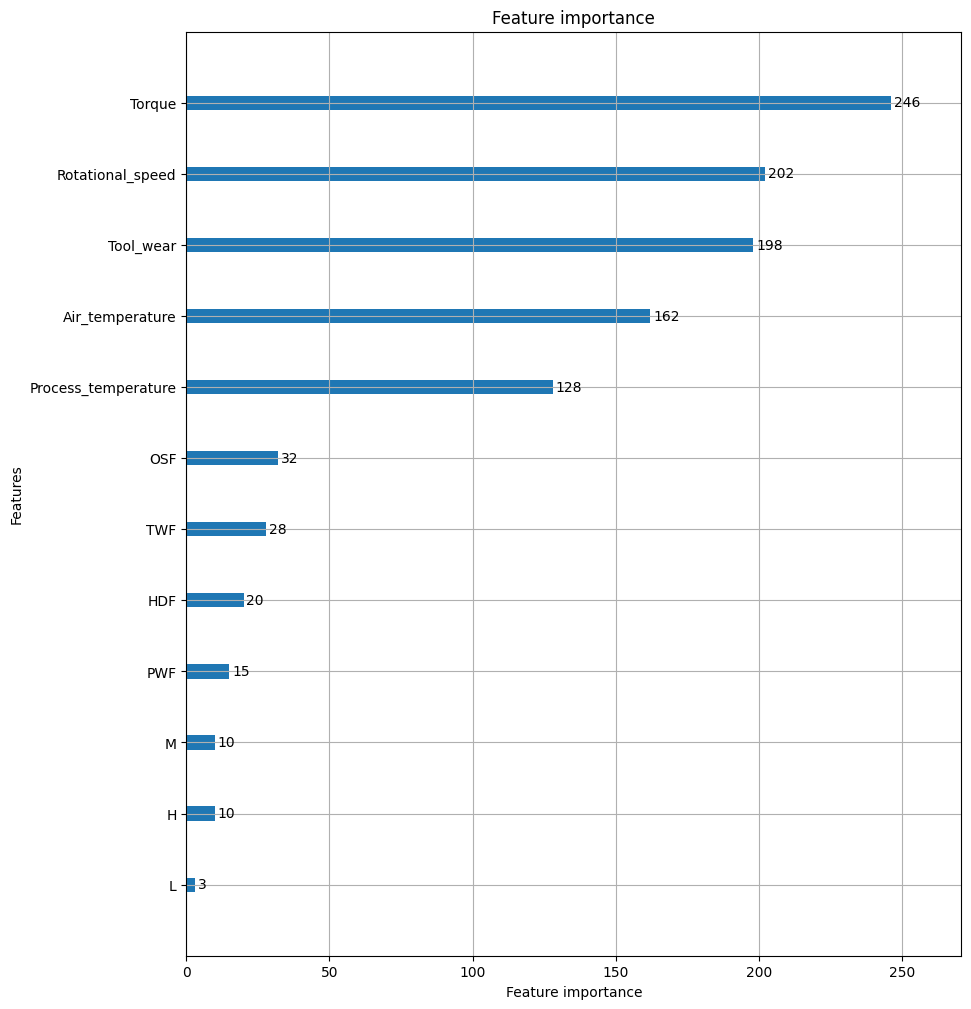

In [39]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

회전력을 나타내는 Torque 피처의 중요도가 가장 높게 나왔다

다음으로는 Rotational_speed, Tool_wear가 비슷한 수준으로 중요하고

Air_temperature, Process_temperature가 그 다음으로 중요한 피처임을 알 수 있다

In [46]:
sample_submission = pd.read_csv('/content/sample_submission.csv')
sample_submission

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5
...,...,...
90949,227378,0.5
90950,227379,0.5
90951,227380,0.5
90952,227381,0.5


In [47]:
sample_submission['Machine failure'] = preds
sample_submission

ValueError: ignored

In [ ]:
sample_submission.to_csv("./machine_submit.csv", index = False)